In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [50]:
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv("./AllFormat.csv")

In [54]:
df.drop(columns="Unnamed: 0",inplace=True)

In [56]:
df.columns

Index(['Country', 'Player', 'Matches', 'Innings', 'Not_Out', 'Runs',
       'Highest_score', 'Average', 'Ball_Faced', 'Strike_Rate', 'Hundreds',
       'Fiftys', 'Zeros', 'Fours', 'Sixes', 'Start_Year', 'End/Current_Year',
       'Format', 'Careerspan'],
      dtype='object')

In [60]:
df

Country           Player  Matches  Innings  Not_Out   Runs  \
0                   India     SR Tendulkar      463      452       41  18426   
1                   India     SR Tendulkar      200      329       33  15921   
2                   India          V Kohli      302      290       45  14181   
3         Sri_Lanka_Lanka    KC Sangakkara      397      373       40  13975   
4               Australia       RT Ponting      374      364       39  13589   
...                   ...              ...      ...      ...      ...    ...   
3648      Sri_Lanka_Lanka  SMLD Samarakoon        1        1        0      1   
3649  South_Africa_Africa     OEG Baartman       12        2        0      1   
3650  South_Africa_Africa     HH Dippenaar        1        1        0      1   
3651  South_Africa_Africa         N Burger        5        1        0      1   
3652          Afghanistan    M Nasim Baras        3        1        0      1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
0               200    44.83       21368        86.23        49      96   
1               248    53.78       29437        54.04        51      68   
2               183    57.88       15192        93.34        51      74   
3               169    41.96       17715        78.88        25      90   
4               164    41.81       16944        80.19        29      82   
...             ...      ...         ...          ...       ...     ...   
3648              1     1.00           3        33.33         0       0   
3649              1     0.50           6        16.66         0       0   
3650              1     1.00           5        20.00         0       0   
3651              1     1.00           3        33.33         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  Careerspan  
0        20   2016    195        1989              2012    ODI          23  
1        14   2058     69        1989              2013   Test          24  
2        16   1325    152        2008              2025    ODI          17  
3        15   1349     86        2000              2015    ODI          15  
4        20   1223    159        1995              2012    ODI          17  
...     ...    ...    ...         ...               ...    ...         ...  
3648      0      0      0        2023              2023    T20           0  
3649      1      0      0        2024              2024    T20           0  
3650      0      0      0        2006              2006    T20           0  
3651      0      0      0        2023              2025    T20           2  
3652      0      0      0        2015              2015    T20           0  

[3653 rows x 19 columns]

In [62]:
allFormat["Careerspan"]=allFormat["End/Current_Year"]-allFormat.Start_Year

In [64]:
df[df.Player=="V Kohli"]

Country   Player  Matches  Innings  Not_Out   Runs  Highest_score  \
2     India  V Kohli      302      290       45  14181            183   
38    India  V Kohli      123      210       13   9230            254   
250   India  V Kohli      125      117       31   4188            122   

     Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  Zeros  Fours  Sixes  \
2      57.88       15192        93.34        51      74     16   1325    152   
38     46.85       16608        55.57        30      31     15   1027     30   
250    48.69        3056       137.04         1      38      7    369    124   

     Start_Year  End/Current_Year Format  Careerspan  
2          2008              2025    ODI          17  
38         2011              2025   Test          14  
250        2010              2024    T20          14

In [66]:
allFormat[allFormat.Player=="V Kohli"]

Player  Matches  Innings  Not_Out   Runs  Highest_score  Ball_Faced  \
2  V Kohli      550      617       89  27599            559       34856   

   Hundreds  Fiftys  Zeros  Fours  Sixes Country  Average  Strike_Rate  \
2        82     143     38   2721    306   India    51.14        95.32   

   Start_Year  End/Current_Year  Careerspan  
2        2008              2025          17

In [15]:
allFormat=df.groupby("Player")[['Matches', 'Innings', 'Not_Out', 'Runs',
       'Highest_score',  'Ball_Faced',  'Hundreds',
       'Fiftys', 'Zeros', 'Fours', 'Sixes']].sum().reset_index()
allFormat.sort_values("Runs",inplace=True,ascending=False)
allFormat

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
1810      SR Tendulkar      664      782       74  34357            458   
986      KC Sangakkara      587      659       66  27757            566   
2005           V Kohli      550      617       89  27599            559   
1659        RT Ponting      559      667       70  27368            519   
501   DPMD Jayawardene      647      720       61  25688            618   
...                ...      ...      ...      ...    ...            ...   
559        EP Thompson        1        1        1      1              1   
251          BG Lister       12        3        1      1              1   
1011          KK Ahmed       18        2        2      1              1   
1792   SMLD Samarakoon        1        1        0      1              1   
1118       M Mpongwana        1        1        1      1              1   

      Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes  
1810       50817       100     164     34   4076    264  
986        41753        63     150     28   2979    157  
2005       34856        82     143     38   2721    306  
1659       40028        70     146     39   2773    243  
501        39816        53     134     47   2658    165  
...          ...       ...     ...    ...    ...    ...  
559            1         0       0      0      0      0  
251            6         0       0      1      0      0  
1011           2         0       0      0      0      0  
1792           3         0       0      0      0      0  
1118           2         0       0      0      0      0  

[2126 rows x 12 columns]

In [17]:
allFormat=allFormat.merge(df[["Player","Country"]].groupby("Player").first().reset_index())

In [19]:
allFormat=allFormat.merge(df.groupby(by="Player")[["Average","Strike_Rate"]].mean().reset_index().round(2))
allFormat=allFormat.merge(df.groupby(by="Player")[["Start_Year"]].min().reset_index())
	
allFormat=allFormat.merge(df.groupby(by="Player")[["End/Current_Year"]].max().reset_index())

In [21]:
allFormat

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0         SR Tendulkar      664      782       74  34357            458   
1        KC Sangakkara      587      659       66  27757            566   
2              V Kohli      550      617       89  27599            559   
3           RT Ponting      559      667       70  27368            519   
4     DPMD Jayawardene      647      720       61  25688            618   
...                ...      ...      ...      ...    ...            ...   
2121       EP Thompson        1        1        1      1              1   
2122         BG Lister       12        3        1      1              1   
2123          KK Ahmed       18        2        2      1              1   
2124   SMLD Samarakoon        1        1        0      1              1   
2125       M Mpongwana        1        1        1      1              1   

      Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes       Country  \
0          50817       100     164     34   4076    264         India   
1          41753        63     150     28   2979    157     Sri_Lanka   
2          34856        82     143     38   2721    306         India   
3          40028        70     146     39   2773    243     Australia   
4          39816        53     134     47   2658    165     Sri_Lanka   
...          ...       ...     ...    ...    ...    ...           ...   
2121           1         0       0      0      0      0   New_Zealand   
2122           6         0       0      1      0      0   New_Zealand   
2123           2         0       0      0      0      0         India   
2124           3         0       0      0      0      0     Sri_Lanka   
2125           2         0       0      0      0      0  South_Africa   

      Average  Strike_Rate  Start_Year  End/Current_Year  
0       36.20        74.53        1989              2013  
1       43.59        84.21        2000              2015  
2       51.14        95.32        2008              2025  
3       40.77        90.56        1995              2012  
4       38.20        87.77        1997              2015  
...       ...          ...         ...               ...  
2121     0.00       100.00        2008              2008  
2122     0.50        16.66        2023              2024  
2123     0.00        50.00        2018              2024  
2124     1.00        33.33        2023              2023  
2125     0.00        50.00        2025              2025  

[2126 rows x 17 columns]

In [23]:
allFormat[allFormat.Player=="R Dravid"]

Player  Matches  Innings  Not_Out   Runs  Highest_score  Ball_Faced  \
6  R Dravid      504      599       71  24064            454       46332   

   Hundreds  Fiftys  Zeros  Fours  Sixes Country  Average  Strike_Rate  \
6        48     145     20   2593     66   India    40.93        87.11   

   Start_Year  End/Current_Year  
6        1996              2012

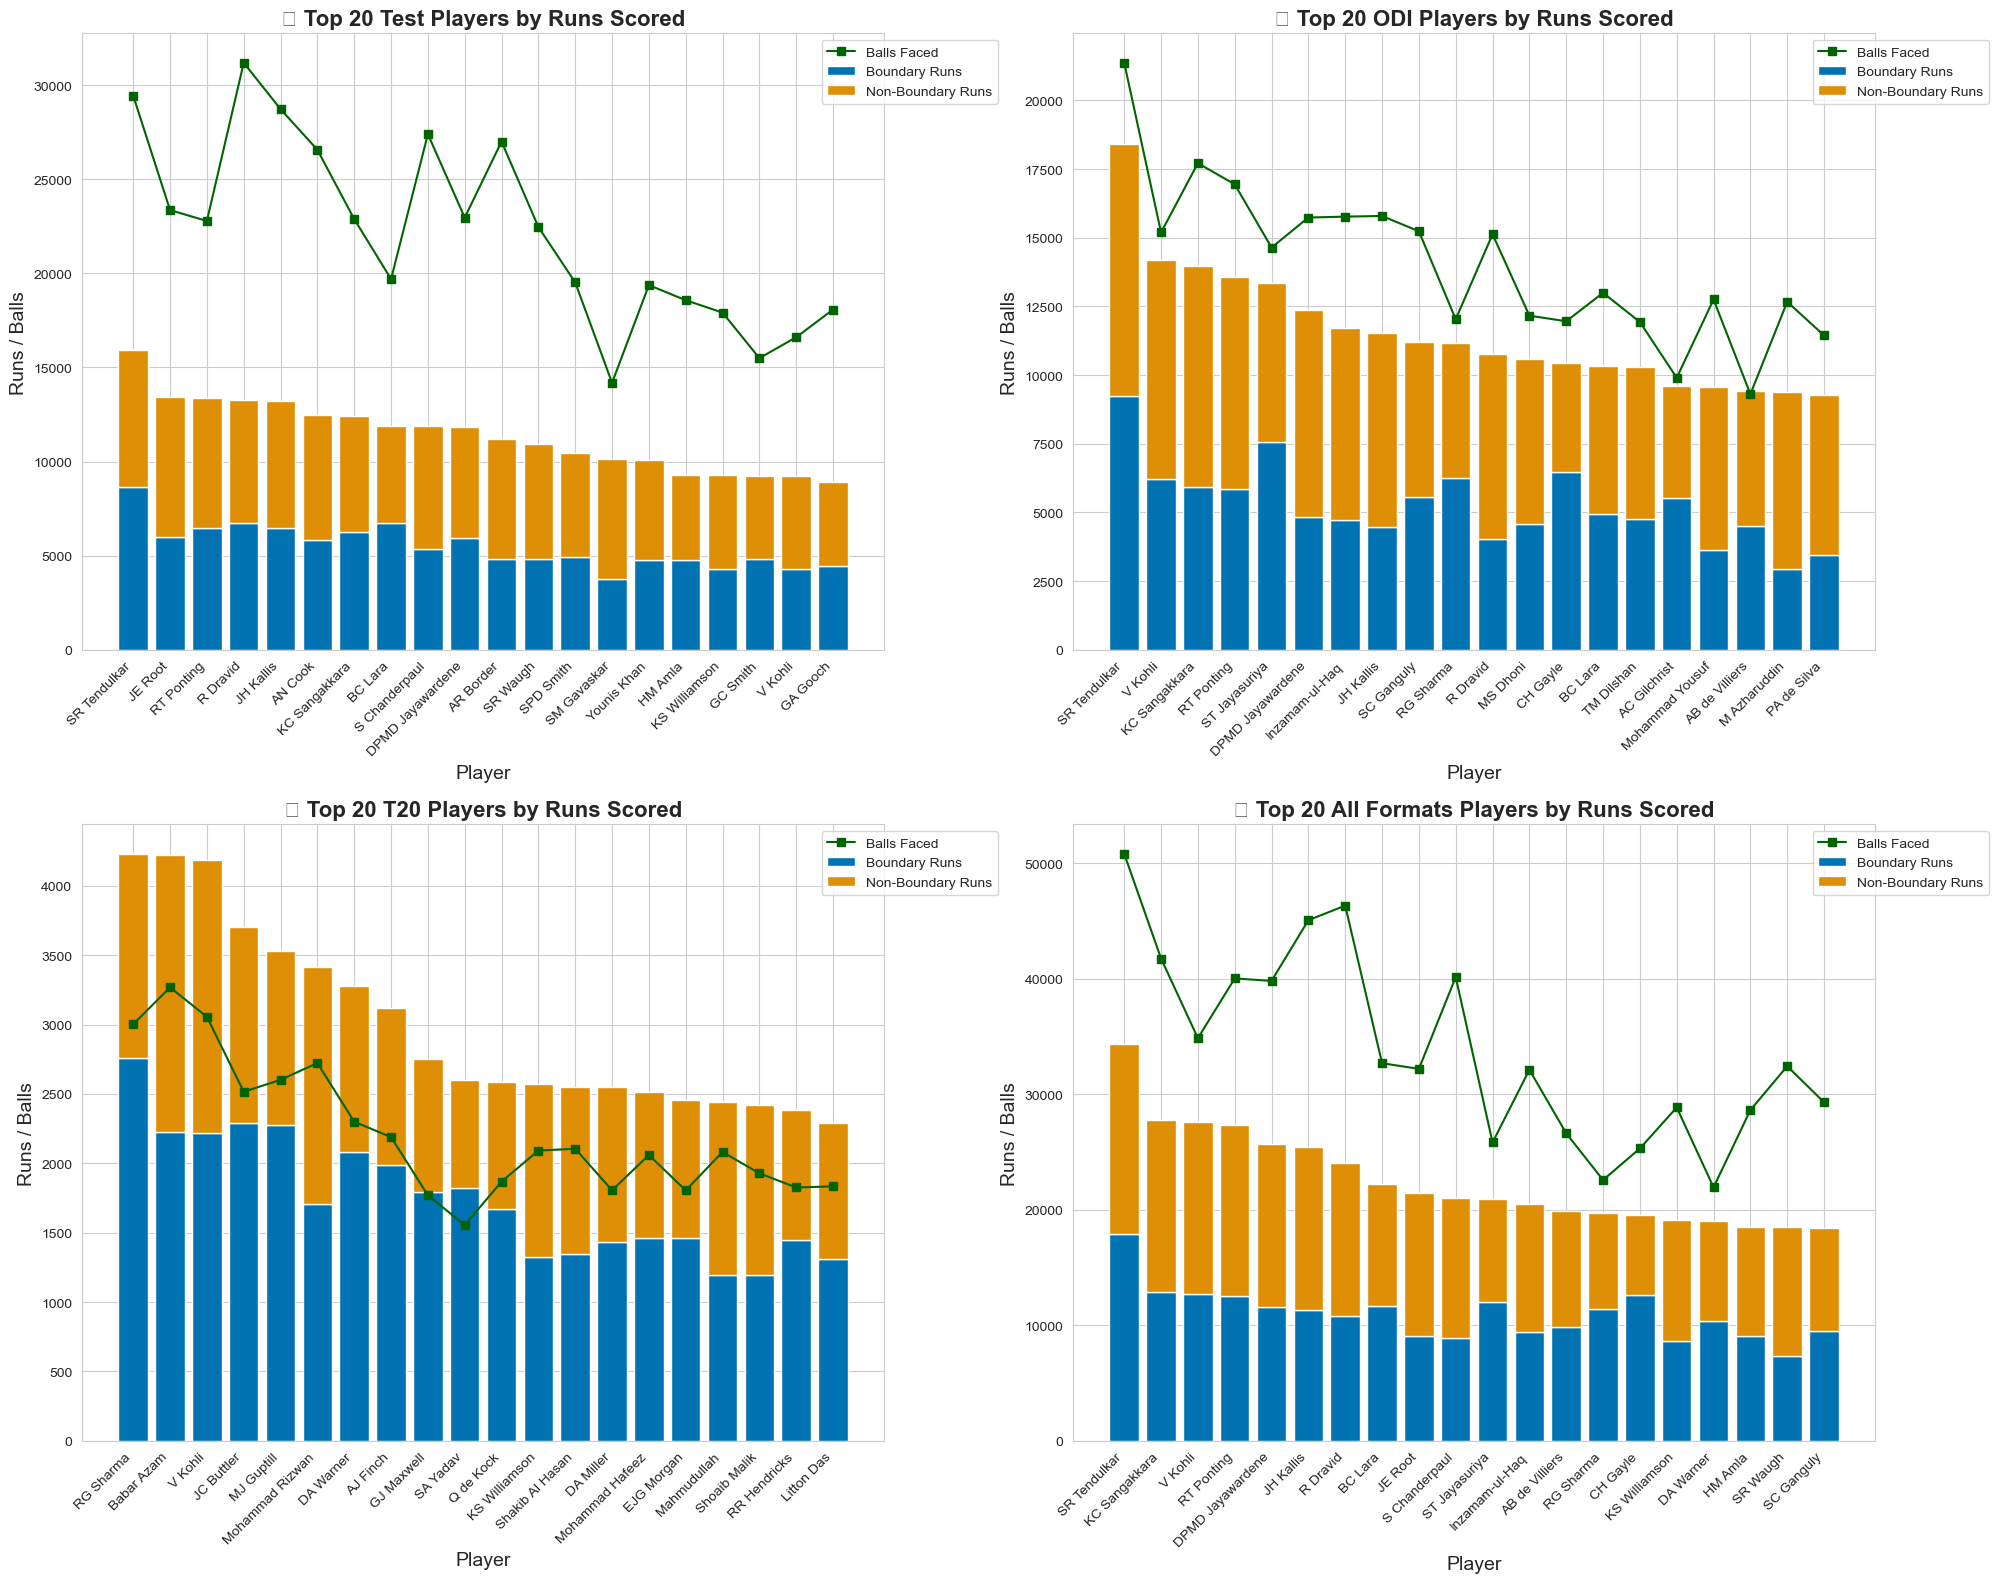

In [302]:


# Prepare datasets
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "All Formats": allFormat.sort_values(by="Runs", ascending=False).head(20).copy()
}

# Add boundary and non-boundary runs
for name, data in formats.items():
    data["BoundaryRuns"] = data["Fours"] * 4 + data["Sixes"] * 6
    data["NonBoundaryRuns"] = data["Runs"] - data["BoundaryRuns"]
    formats[name] = data

# Set Seaborn style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("colorblind", 2)  # Use colorblind-friendly palette

# Create figure
plt.figure(figsize=(20, 16))

plot_order = ["Test", "ODI", "T20", "All Formats"]

for idx, fmt in enumerate(plot_order, start=1):
    plt.subplot(2, 2, idx)
    data = formats[fmt]

    # Stacked bar chart
    plt.bar(data["Player"], data["BoundaryRuns"], label="Boundary Runs", color=palette[0])
    plt.bar(data["Player"], data["NonBoundaryRuns"], bottom=data["BoundaryRuns"], 
            label="Non-Boundary Runs", color=palette[1])

    # Line for Balls Faced
    plt.plot(data["Player"], data["Ball_Faced"], color="darkgreen", marker="s", label="Balls Faced")

    # Customize plot
    plt.title(f"🏏 Top 20 {fmt} Players by Runs Scored", fontsize=16, weight='bold')
    plt.xlabel('Player', fontsize=14)
    plt.ylabel('Runs / Balls', fontsize=14)
    plt.xticks(fontsize=10, rotation=45, ha="right")
    plt.yticks(fontsize=10)
    
    # Move legend outside to avoid overlap
    plt.legend(fontsize=10, title_fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

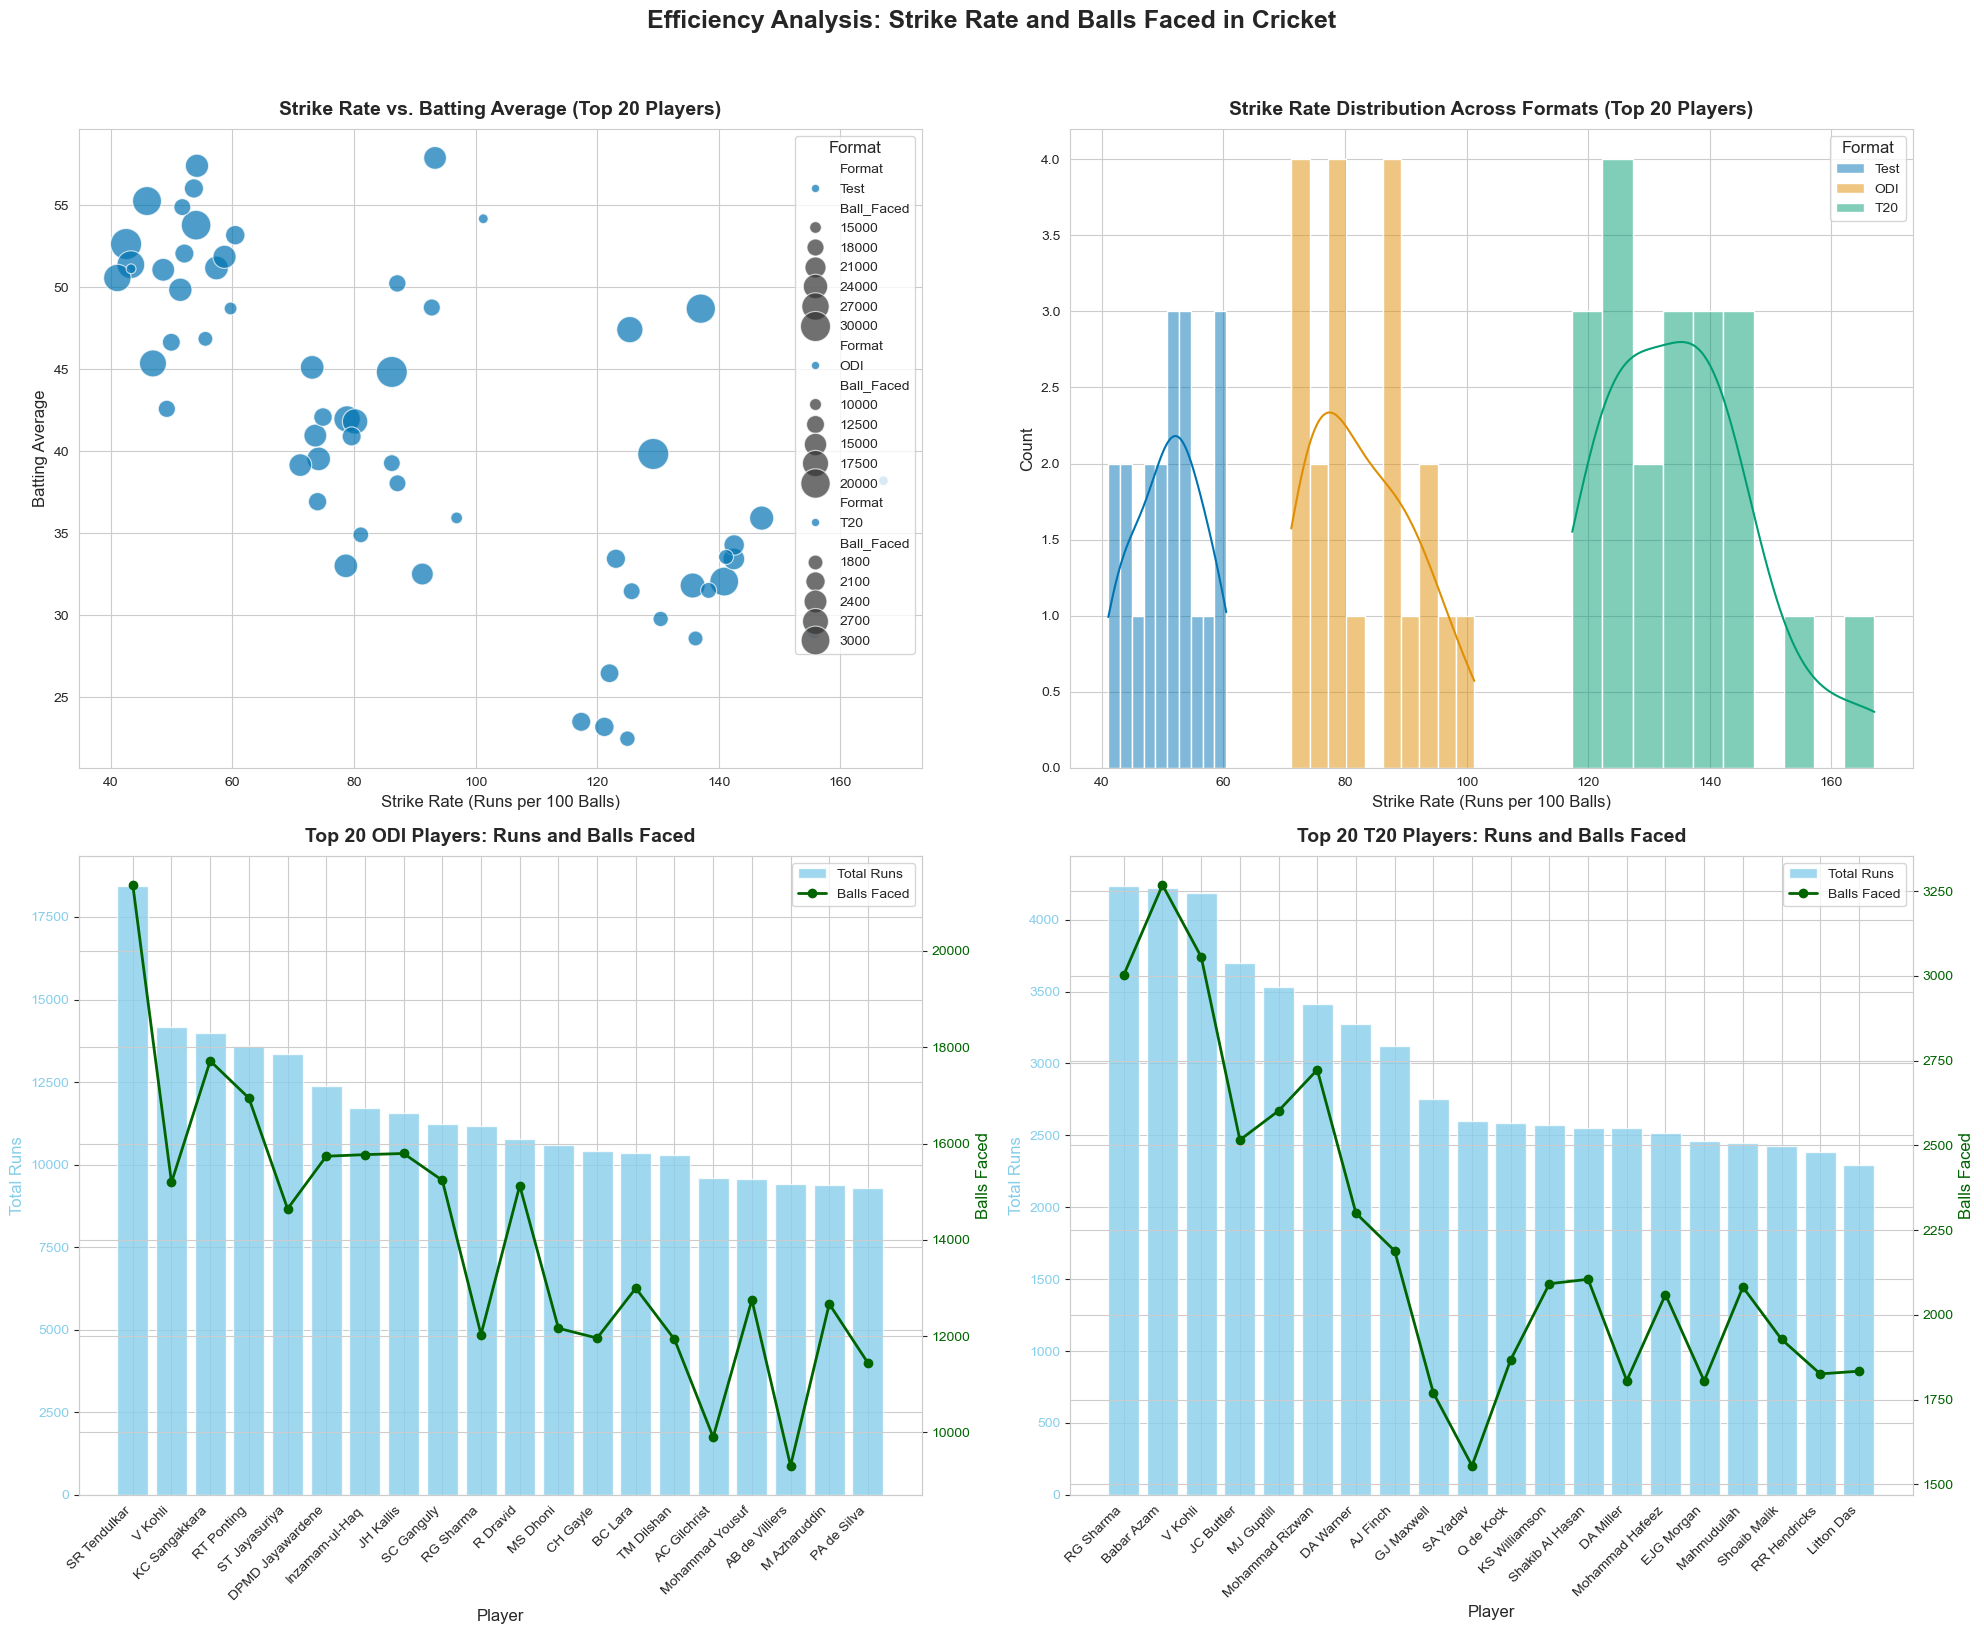


Efficiency Stats for Test:
               Runs    Ball_Faced  Strike_Rate    Average
count     20.000000     20.000000    20.000000  20.000000
mean   11419.200000  22209.050000    51.009000  51.113500
std     1877.003985   4909.737826     5.871053   3.713438
min     8900.000000  14184.000000    41.090000  42.580000
25%     9894.750000  18448.500000    46.705000  49.555000
50%    11494.000000  22621.500000    51.615000  51.270000
75%    12655.500000  26672.000000    54.535000  53.322500
max    15921.000000  31184.000000    60.480000  57.400000

Efficiency Stats for ODI:
               Runs    Ball_Faced  Strike_Rate    Average
count     20.000000     20.000000    20.000000  20.000000
mean   11561.200000  14034.250000    83.094000  41.897000
std     2253.357275   2866.068532     8.764209   6.707571
min     9284.000000   9308.000000    71.180000  32.510000
25%    10116.250000  12015.500000    74.732500  37.760000
50%    10968.000000  13820.000000    80.660000  40.925000
75%    12626.7500

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare datasets for each format (top 20 players by runs)
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "All Formats": allFormat.sort_values(by="Runs", ascending=False).head(20).copy()
}


# Set Seaborn style for professional aesthetics
sns.set_style("whitegrid")
sns.set_palette("colorblind")  # Accessible and visually appealing colors
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'legend.title_fontsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

# Create a figure with subplots (2 rows, 2 columns)
fig = plt.figure(figsize=(20, 16), constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# 1. Scatter Plot: Strike Rate vs. Batting Average
ax1 = fig.add_subplot(gs[0, 0])
for fmt in ["Test", "ODI", "T20"]:
    data = formats[fmt]
    if data.empty:
        print(f"No data for {fmt} format")
        continue
    sns.scatterplot(
        x="Strike_Rate",
        y="Average",
        hue="Format",
        size="Ball_Faced",
        sizes=(50, 500),
        alpha=0.7,
        data=data.assign(Format=fmt)
    )
ax1.set_title("Strike Rate vs. Batting Average (Top 20 Players)", fontsize=14, weight='bold', pad=10)
ax1.set_xlabel("Strike Rate (Runs per 100 Balls)", fontsize=12)
ax1.set_ylabel("Batting Average", fontsize=12)
ax1.legend(title="Format", loc='upper right')

# 2. Histogram: Distribution of Strike Rates
ax2 = fig.add_subplot(gs[0, 1])
for fmt in ["Test", "ODI", "T20"]:
    data = formats[fmt]
    if data.empty:
        print(f"No data for {fmt} format")
        continue
    sns.histplot(data=data, x="Strike_Rate", label=fmt, kde=True, alpha=0.5, bins=10)
ax2.set_title("Strike Rate Distribution Across Formats (Top 20 Players)", fontsize=14, weight='bold', pad=10)
ax2.set_xlabel("Strike Rate (Runs per 100 Balls)", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.legend(title="Format", loc='upper right')

# 3. Bar-Line Plot: Runs and Balls Faced for ODI and T20
for idx, fmt in enumerate(["ODI", "T20"], start=1):
    ax = fig.add_subplot(gs[1, idx-1])
    data = formats[fmt]
    if data.empty:
        print(f"No data for {fmt} format")
        continue
    
    # Bar for Runs, Line for Balls Faced
    bars = ax.bar(data["Player"], data["Runs"], label="Total Runs", color="skyblue", alpha=0.8)
    ax2 = ax.twinx()  # Secondary y-axis for Balls Faced
    ax2.plot(data["Player"], data["Ball_Faced"], color="darkgreen", marker="o", linewidth=2, label="Balls Faced")
    
    # Customize
    ax.set_title(f"Top 20 {fmt} Players: Runs and Balls Faced", fontsize=14, weight='bold', pad=10)
    ax.set_xlabel("Player", fontsize=12)
    ax.set_ylabel("Total Runs", fontsize=12, color="skyblue")
    ax2.set_ylabel("Balls Faced", fontsize=12, color="darkgreen")
    ax.tick_params(axis='y', labelcolor="skyblue")
    ax2.tick_params(axis='y', labelcolor="darkgreen")
    ax.set_xticklabels(data["Player"], rotation=45, ha="right")
    
    # Combine legends
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust layout and add a super title
fig.suptitle("Efficiency Analysis: Strike Rate and Balls Faced in Cricket", fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 4. Summary Statistics for Efficiency
for fmt, data in formats.items():
    if data.empty:
        print(f"No data for {fmt} format")
        continue
    print(f"\nEfficiency Stats for {fmt}:")
    print(data[["Player", "Runs", "Ball_Faced", "Strike_Rate", "Average"]].describe())

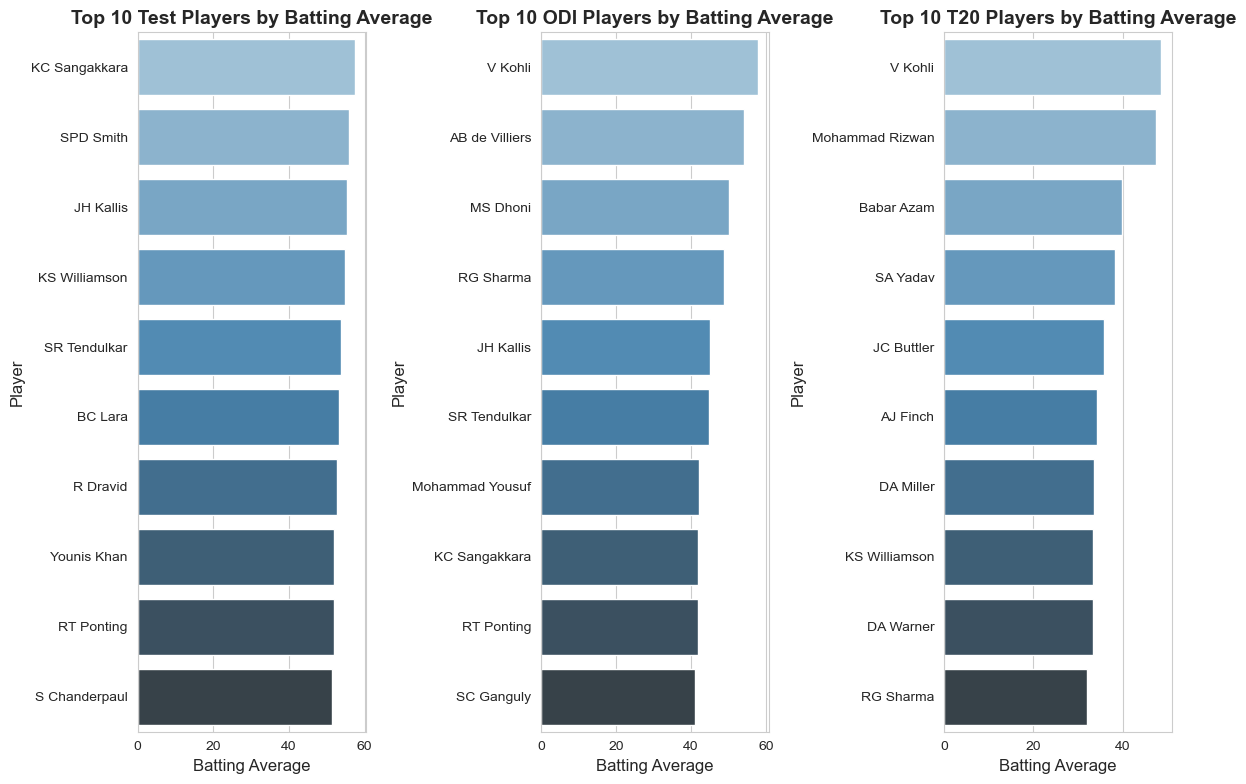

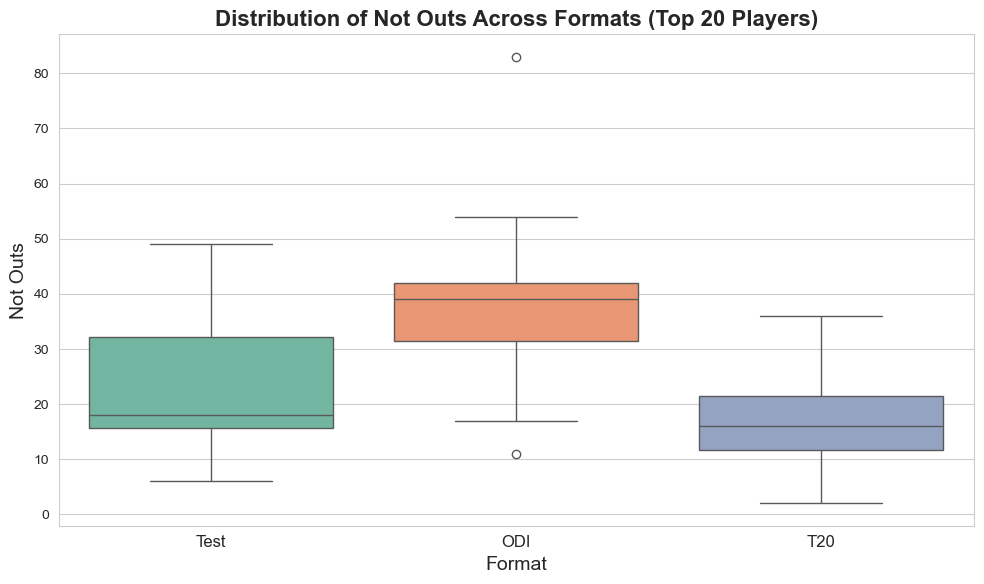

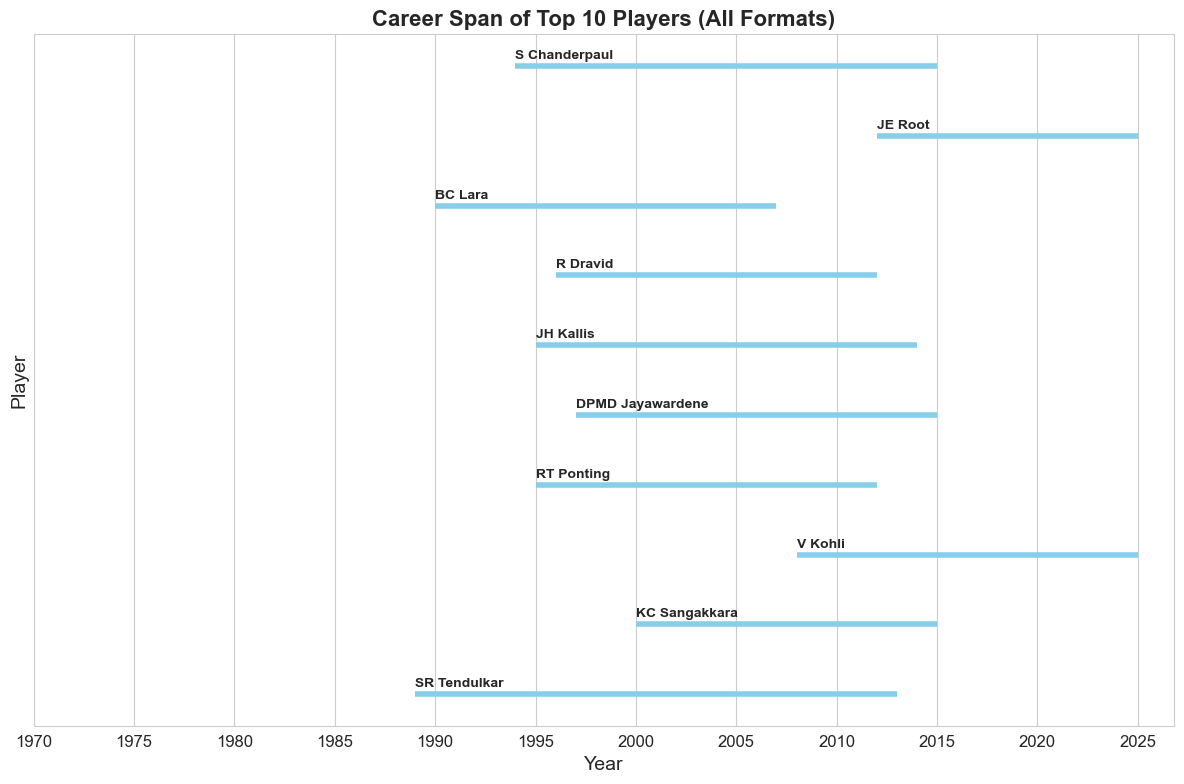

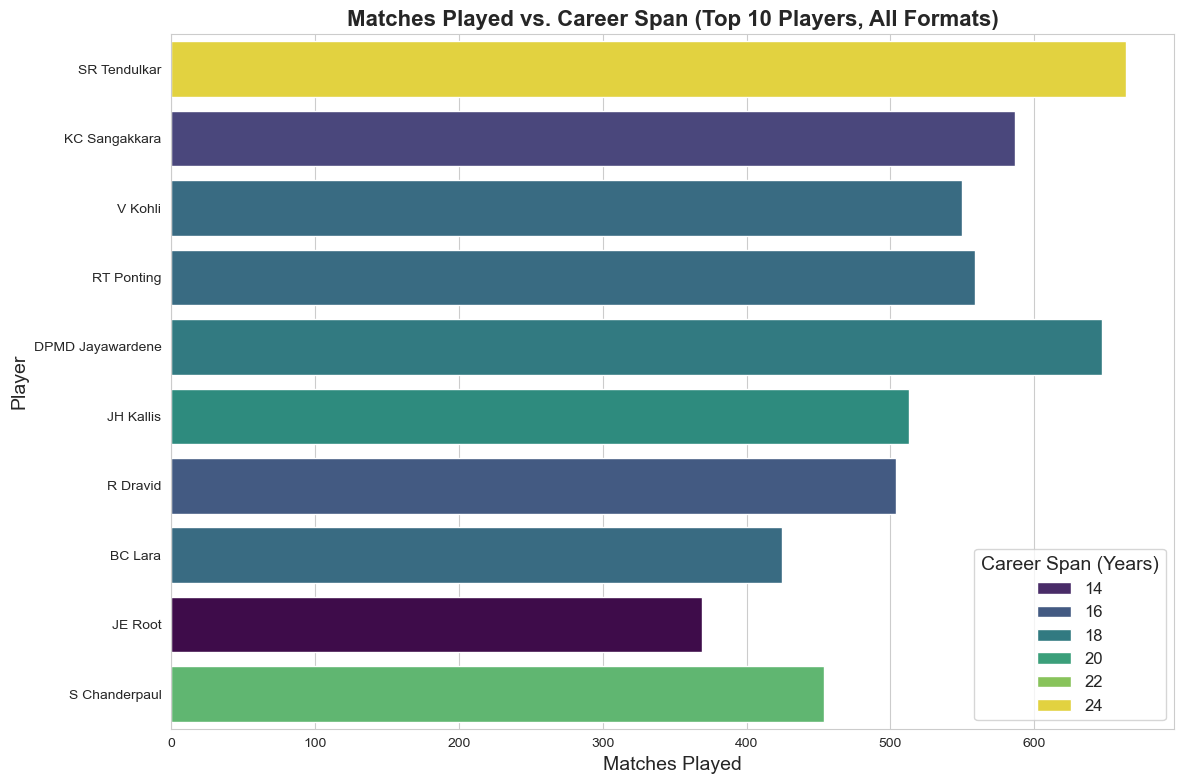

In [304]:

# Calculate career span
df['Career_Span'] = df['End/Current_Year'] - df['Start_Year']

# Prepare datasets for each format (top 20 players by runs)
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "All Formats": allFormat.sort_values(by="Runs", ascending=False).head(20).copy()
}

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 1. Bar Chart: Top 10 Players by Batting Average per Format
plt.figure(figsize=(12, 8))
for idx, fmt in enumerate(["Test", "ODI", "T20"], start=1):
    plt.subplot(1, 3, idx)
    data = formats[fmt].sort_values(by="Average", ascending=False).head(10)
    if data.empty:
        print(f"No data for {fmt} format")
        continue
    sns.barplot(x="Average", y="Player", data=data, palette="Blues_d")
    plt.title(f"Top 10 {fmt} Players by Batting Average", fontsize=14, weight='bold')
    plt.xlabel("Batting Average", fontsize=12)
    plt.ylabel("Player", fontsize=12)
    plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Box Plot: Distribution of Not Outs by Format
plt.figure(figsize=(10, 6))
not_outs_data = pd.concat([formats[fmt][["Not_Out", "Format"]].assign(Format=fmt) for fmt in ["Test", "ODI", "T20"]])
if not not_outs_data.empty:
    sns.boxplot(x="Format", y="Not_Out", data=not_outs_data, palette="Set2")
    plt.title("Distribution of Not Outs Across Formats (Top 20 Players)", fontsize=16, weight='bold')
    plt.xlabel("Format", fontsize=14)
    plt.ylabel("Not Outs", fontsize=14)
    plt.xticks(fontsize=12)
else:
    print("No data for Not Outs plot")
plt.tight_layout()
plt.show()

# 3. Timeline Plot: Career Span for Top Players
plt.figure(figsize=(12, 8))
data = formats["All Formats"].head(10).copy()
if not data.empty:
    for i, row in data.iterrows():
        plt.hlines(y=i, xmin=row["Start_Year"], xmax=row["End/Current_Year"], color="skyblue", lw=4)
        plt.text(row["Start_Year"], i+0.1, row["Player"], fontsize=10, weight='bold')
    plt.title("Career Span of Top 10 Players (All Formats)", fontsize=16, weight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Player", fontsize=14)
    plt.yticks([])
    plt.xticks(range(1970, 2030, 5), fontsize=12)
else:
    print("No data for Career Span plot")
plt.tight_layout()
plt.show()

# 4. Bar Chart: Matches Played vs. Career Span
plt.figure(figsize=(12, 8))
data = formats["All Formats"].head(10).copy()
if not data.empty:
    data["Career_Span"] = data["End/Current_Year"] - data["Start_Year"]
    sns.barplot(x="Matches", y="Player", hue="Career_Span", dodge=False, data=data, palette="viridis")
    plt.title("Matches Played vs. Career Span (Top 10 Players, All Formats)", fontsize=16, weight='bold')
    plt.xlabel("Matches Played", fontsize=14)
    plt.ylabel("Player", fontsize=14)
    plt.legend(title="Career Span (Years)", fontsize=12, title_fontsize=14)
else:
    print("No data for Matches vs. Career Span plot")
plt.tight_layout()
plt.show() 


In [240]:
allFormat

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0         SR Tendulkar      664      782       74  34357            458   
1        KC Sangakkara      587      659       66  27757            566   
2              V Kohli      550      617       89  27599            559   
3           RT Ponting      559      667       70  27368            519   
4     DPMD Jayawardene      647      720       61  25688            618   
...                ...      ...      ...      ...    ...            ...   
2121       EP Thompson        1        1        1      1              1   
2122         BG Lister       12        3        1      1              1   
2123          KK Ahmed       18        2        2      1              1   
2124   SMLD Samarakoon        1        1        0      1              1   
2125       M Mpongwana        1        1        1      1              1   

      Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes       Country  \
0          50817       100     164     34   4076    264         India   
1          41753        63     150     28   2979    157     Sri_Lanka   
2          34856        82     143     38   2721    306         India   
3          40028        70     146     39   2773    243     Australia   
4          39816        53     134     47   2658    165     Sri_Lanka   
...          ...       ...     ...    ...    ...    ...           ...   
2121           1         0       0      0      0      0   New_Zealand   
2122           6         0       0      1      0      0   New_Zealand   
2123           2         0       0      0      0      0         India   
2124           3         0       0      0      0      0     Sri_Lanka   
2125           2         0       0      0      0      0  South_Africa   

      Average  Strike_Rate  
0       36.20        74.53  
1       43.59        84.21  
2       51.14        95.32  
3       40.77        90.56  
4       38.20        87.77  
...       ...          ...  
2121     0.00       100.00  
2122     0.50        16.66  
2123     0.00        50.00  
2124     1.00        33.33  
2125     0.00        50.00  

[2126 rows x 15 columns]

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Prepare datasets
# formats = {
#     "Test": df[df.Format=="Test"].sort_values(by="Runs", ascending=False).head(20).copy(),
#     "ODI": df[df.Format=="ODI"].sort_values(by="Runs", ascending=False).head(20).copy(),
#     "T20": df[df.Format=="T20"].sort_values(by="Runs", ascending=False).head(20).copy(),
#     "All Formats": allFormat.sort_values(by="Runs", ascending=False).head(20).copy()
# }

# # Add boundary runs
# for name, data in formats.items():
#     data["BoundaryRuns"] = data["Fours"]*4 + data["Sixes"]*6
#     formats[name] = data

# # Plot
# sns.set_style("whitegrid")
# plt.figure(figsize=(22, 18))

# plot_order = ["Test", "ODI", "T20", "All Formats"]

# for idx, fmt in enumerate(plot_order, start=1):
#     plt.subplot(2, 2, idx)
#     data = formats[fmt]

#     ax = sns.barplot(
#         y="Runs", x="Player", hue="Country", 
#         data=data, orient="v"
#     )
#     sns.lineplot(
#         data=data,
#         x="Player", y="BoundaryRuns",
#         marker="o", color="red", ax=ax,
#         label="Boundary Runs"
#     )

#     sns.barplot(data["Ball_Faced"], color="green", marker="s", label="Balls Faced")

    
#     plt.title(f"🏏 Top 20 {fmt} Players by Runs Scored",
#               fontsize=20, weight='bold')
#     plt.xlabel('Player', fontsize=18)
#     plt.ylabel('Total Runs', fontsize=18)
#     plt.xticks(fontsize=10, rotation=45, ha="right")
#     plt.yticks(fontsize=12)
#     plt.legend(fontsize=10, title_fontsize=12)

# plt.tight_layout()
# plt.show()


In [205]:
allFormat

Unnamed: 0      Country           Player  Matches  Innings  Not_Out  \
0              0        India     SR Tendulkar      463      452       41   
1              1        India          V Kohli      302      290       45   
2              2        India       SC Ganguly      308      297       23   
3              3        India        RG Sharma      273      265       36   
4              4        India         R Dravid      340      314       39   
...          ...          ...              ...      ...      ...      ...   
3648        3648  Afghanistan  Dawlat Ahmadzai        2        1        1   
3649        3649  Afghanistan       Aftab Alam       12        5        3   
3650        3650  Afghanistan   Yamin Ahmadzai        2        1        1   
3651        3651  Afghanistan    Sayed Shirzad        4        1        0   
3652        3652  Afghanistan    M Nasim Baras        3        1        0   

       Runs  Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  \
0     18426            200    44.83       21368        86.23        49   
1     14181            183    57.88       15192        93.34        51   
2     11221            183    40.95       15235        73.65        22   
3     11168            264    48.76       12034        92.80        32   
4     10768            153    39.15       15127        71.18        12   
...     ...            ...      ...         ...          ...       ...   
3648      2              2     0.00           3        66.66         0   
3649      2              1     1.00           9        22.22         0   
3650      1              1     0.00           1       100.00         0   
3651      1              1     1.00           2        50.00         0   
3652      1              1     1.00           2        50.00         0   

      Fiftys  Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  \
0         96     20   2016    195        1989              2012    ODI   
1         74     16   1325    152        2008              2025    ODI   
2         71     16   1104    189        1992              2007    ODI   
3         58     16   1045    344        2007              2025    ODI   
4         82     13    942     42        1996              2011    ODI   
...      ...    ...    ...    ...         ...               ...    ...   
3648       0      0      0      0        2010              2010    T20   
3649       0      1      0      0        2012              2018    T20   
3650       0      0      0      0        2015              2015    T20   
3651       0      0      0      0        2015              2019    T20   
3652       0      0      0      0        2015              2015    T20   

      Careerspan  
0             23  
1             17  
2             15  
3             18  
4             15  
...          ...  
3648           0  
3649           6  
3650           0  
3651           4  
3652           0  

[3653 rows x 20 columns]

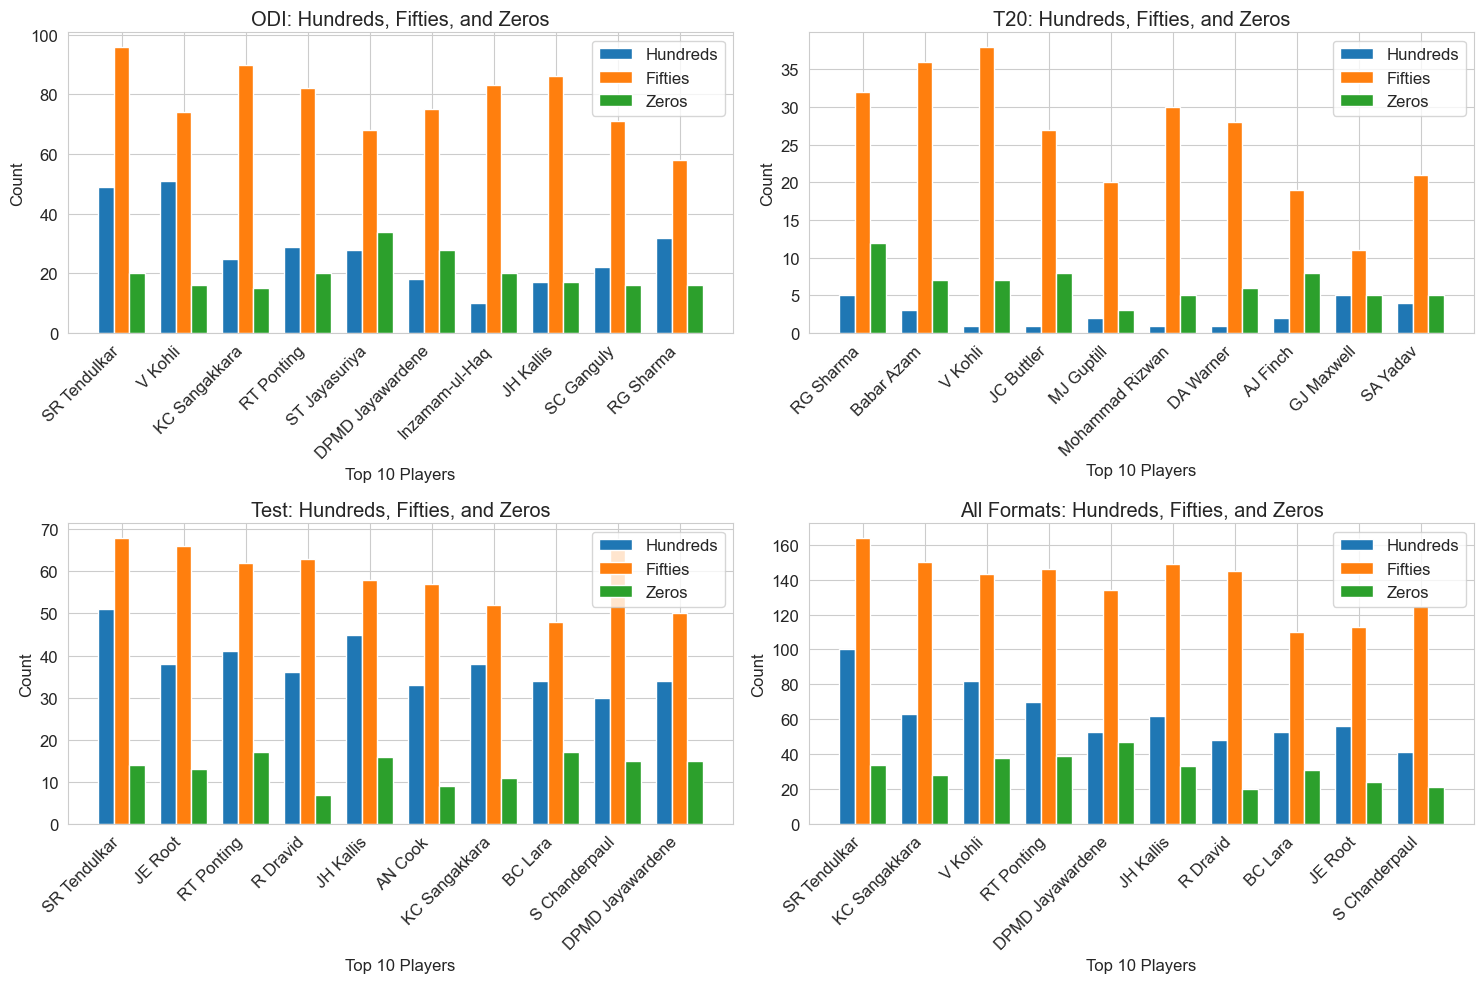

In [25]:
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).head(20).copy(),
    "All Formats": allFormat.sort_values(by="Runs", ascending=False).head(20).copy()
}

# Set Seaborn style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 5. Grouped Bar Chart: Hundreds, Fifties, and Zeros for Top 10 Players in Each Format
plt.figure(figsize=(15, 10))
for idx, fmt in enumerate(["ODI", "T20","Test", "All Formats"], start=1):  # Sample has no Test
    plt.subplot(2, 2, idx)
    data = formats[fmt].head(10)
    if data.empty:
        continue
    x = np.arange(len(data))
    width = 0.25
    plt.bar(x - width, data['Hundreds'], width, label='Hundreds')
    plt.bar(x, data['Fiftys'], width, label='Fifties')
    plt.bar(x + width, data['Zeros'], width, label='Zeros')
    plt.xlabel('Top 10 Players')
    plt.ylabel('Count')
    plt.title(f'{fmt}: Hundreds, Fifties, and Zeros')
    plt.xticks(x, data['Player'], rotation=45, ha='right')
    plt.legend()
plt.tight_layout()
plt.show()


In [114]:
df

Unnamed: 0.1  Unnamed: 0      Country           Player  Matches  \
0                0           0        India     SR Tendulkar      463   
1                1           1        India          V Kohli      302   
2                2           2        India       SC Ganguly      308   
3                3           3        India        RG Sharma      273   
4                4           4        India         R Dravid      340   
...            ...         ...          ...              ...      ...   
3648           909         919  Afghanistan  Dawlat Ahmadzai        2   
3649           910         920  Afghanistan       Aftab Alam       12   
3650           911         921  Afghanistan   Yamin Ahmadzai        2   
3651           912         922  Afghanistan    Sayed Shirzad        4   
3652           913         923  Afghanistan    M Nasim Baras        3   

      Innings  Not_Out   Runs  Highest_score  Average  ...  Fours  Sixes  \
0         452       41  18426            200    44.83  ...   2016    195   
1         290       45  14181            183    57.88  ...   1325    152   
2         297       23  11221            183    40.95  ...   1104    189   
3         265       36  11168            264    48.76  ...   1045    344   
4         314       39  10768            153    39.15  ...    942     42   
...       ...      ...    ...            ...      ...  ...    ...    ...   
3648        1        1      2              2     0.00  ...      0      0   
3649        5        3      2              1     1.00  ...      0      0   
3650        1        1      1              1     0.00  ...      0      0   
3651        1        0      1              1     1.00  ...      0      0   
3652        1        0      1              1     1.00  ...      0      0   

      Start_Year  End/Current_Year  Format  Career_Span  BoundaryRuns  \
0           1989              2012     ODI           23          9234   
1           2008              2025     ODI           17          6212   
2           1992              2007     ODI           15          5550   
3           2007              2025     ODI           18          6244   
4           1996              2011     ODI           15          4020   
...          ...               ...     ...          ...           ...   
3648        2010              2010     T20            0             0   
3649        2012              2018     T20            6             0   
3650        2015              2015     T20            0             0   
3651        2015              2019     T20            4             0   
3652        2015              2015     T20            0             0   

      NonBoundaryRuns  BoundaryPercentage   Status  
0                9192           50.113969  Retired  
1                7969           43.805091   Active  
2                5671           49.460832  Retired  
3                4924           55.909742   Active  
4                6748           37.332838  Retired  
...               ...                 ...      ...  
3648                2            0.000000  Retired  
3649                2            0.000000  Retired  
3650                1            0.000000  Retired  
3651                1            0.000000  Retired  
3652                1            0.000000  Retired  

[3653 rows x 25 columns]

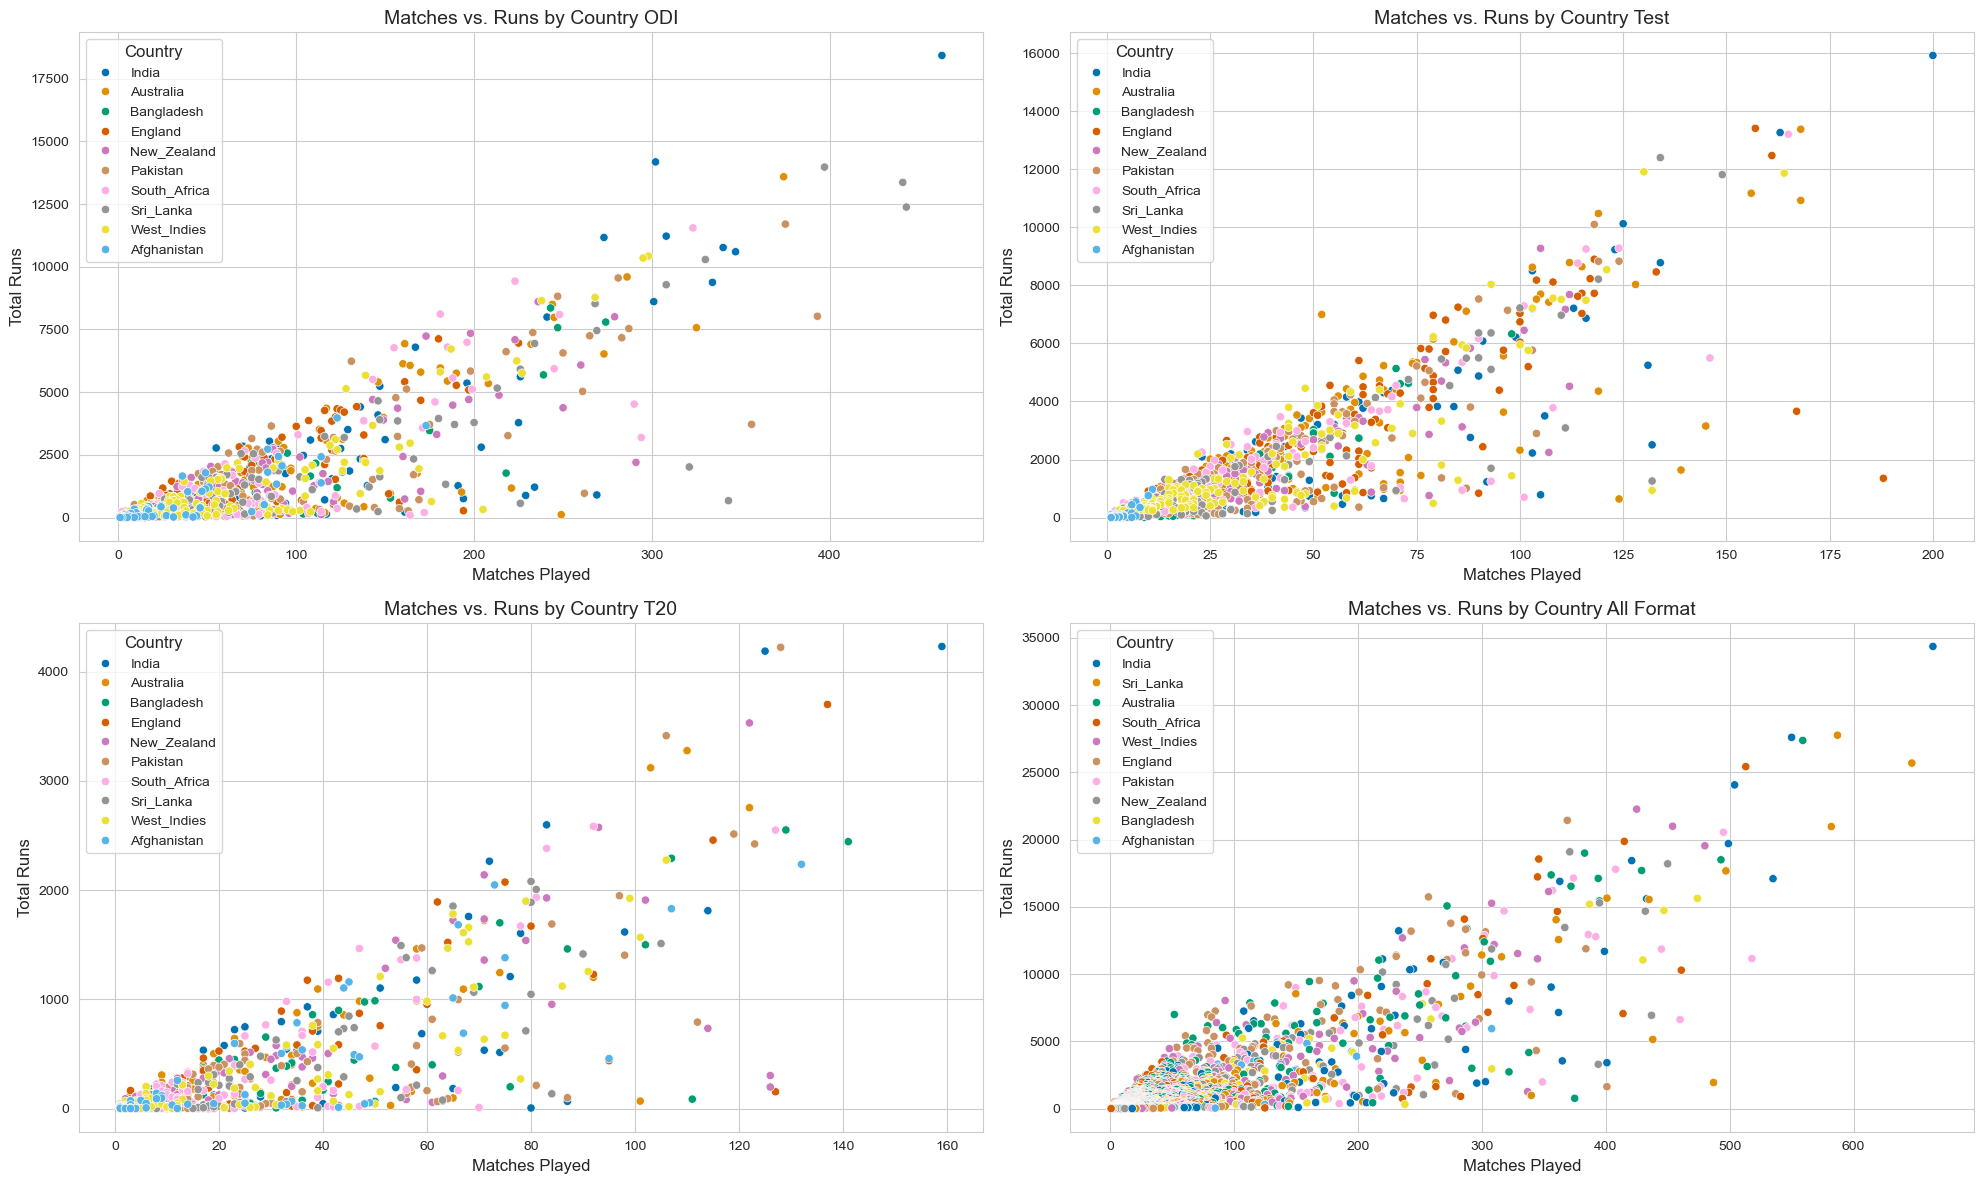

In [310]:
# Scatter plot: Matches vs. Runs, colored by Country, sized by Career Length
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="ODI"])
plt.title('Matches vs. Runs by Country ODI')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')


plt.subplot(2,2,2)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="Test"])
plt.title('Matches vs. Runs by Country Test')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')

plt.subplot(2,2,3)

sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="T20"])
plt.title('Matches vs. Runs by Country T20')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')


plt.subplot(2,2,4)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=allFormat)
plt.title('Matches vs. Runs by Country All Format')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

In [311]:
df[df.Format=="T20"]

Country           Player  Matches  Innings  Not_Out  Runs  \
2739        India        RG Sharma      159      151       19  4231   
2740        India          V Kohli      125      117       31  4188   
2741        India         SA Yadav       83       79       11  2598   
2742        India         KL Rahul       72       68        8  2265   
2743        India        HH Pandya      114       90       25  1812   
...           ...              ...      ...      ...      ...   ...   
3648  Afghanistan  Dawlat Ahmadzai        2        1        1     2   
3649  Afghanistan       Aftab Alam       12        5        3     2   
3650  Afghanistan   Yamin Ahmadzai        2        1        1     1   
3651  Afghanistan    Sayed Shirzad        4        1        0     1   
3652  Afghanistan    M Nasim Baras        3        1        0     1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
2739            121    32.05        3003       140.89         5      32   
2740            122    48.69        3056       137.04         1      38   
2741            117    38.20        1555       167.07         4      21   
2742            110    37.75        1628       139.12         2      22   
2743             71    27.87        1279       141.67         0       5   
...             ...      ...         ...          ...       ...     ...   
3648              2     0.00           3        66.66         0       0   
3649              1     1.00           9        22.22         0       0   
3650              1     0.00           1       100.00         0       0   
3651              1     1.00           2        50.00         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  Careerspan  \
2739     12    383    205        2007              2024    T20          17   
2740      7    369    124        2010              2024    T20          14   
2741      5    237    146        2021              2025    T20           4   
2742      5    191     99        2016              2022    T20           6   
2743      3    135     95        2016              2025    T20           9   
...     ...    ...    ...         ...               ...    ...         ...   
3648      0      0      0        2010              2010    T20           0   
3649      1      0      0        2012              2018    T20           6   
3650      0      0      0        2015              2015    T20           0   
3651      0      0      0        2015              2019    T20           4   
3652      0      0      0        2015              2015    T20           0   

      Career_Span  
2739           17  
2740           14  
2741            4  
2742            6  
2743            9  
...           ...  
3648            0  
3649            6  
3650            0  
3651            4  
3652            0  

[914 rows x 20 columns]

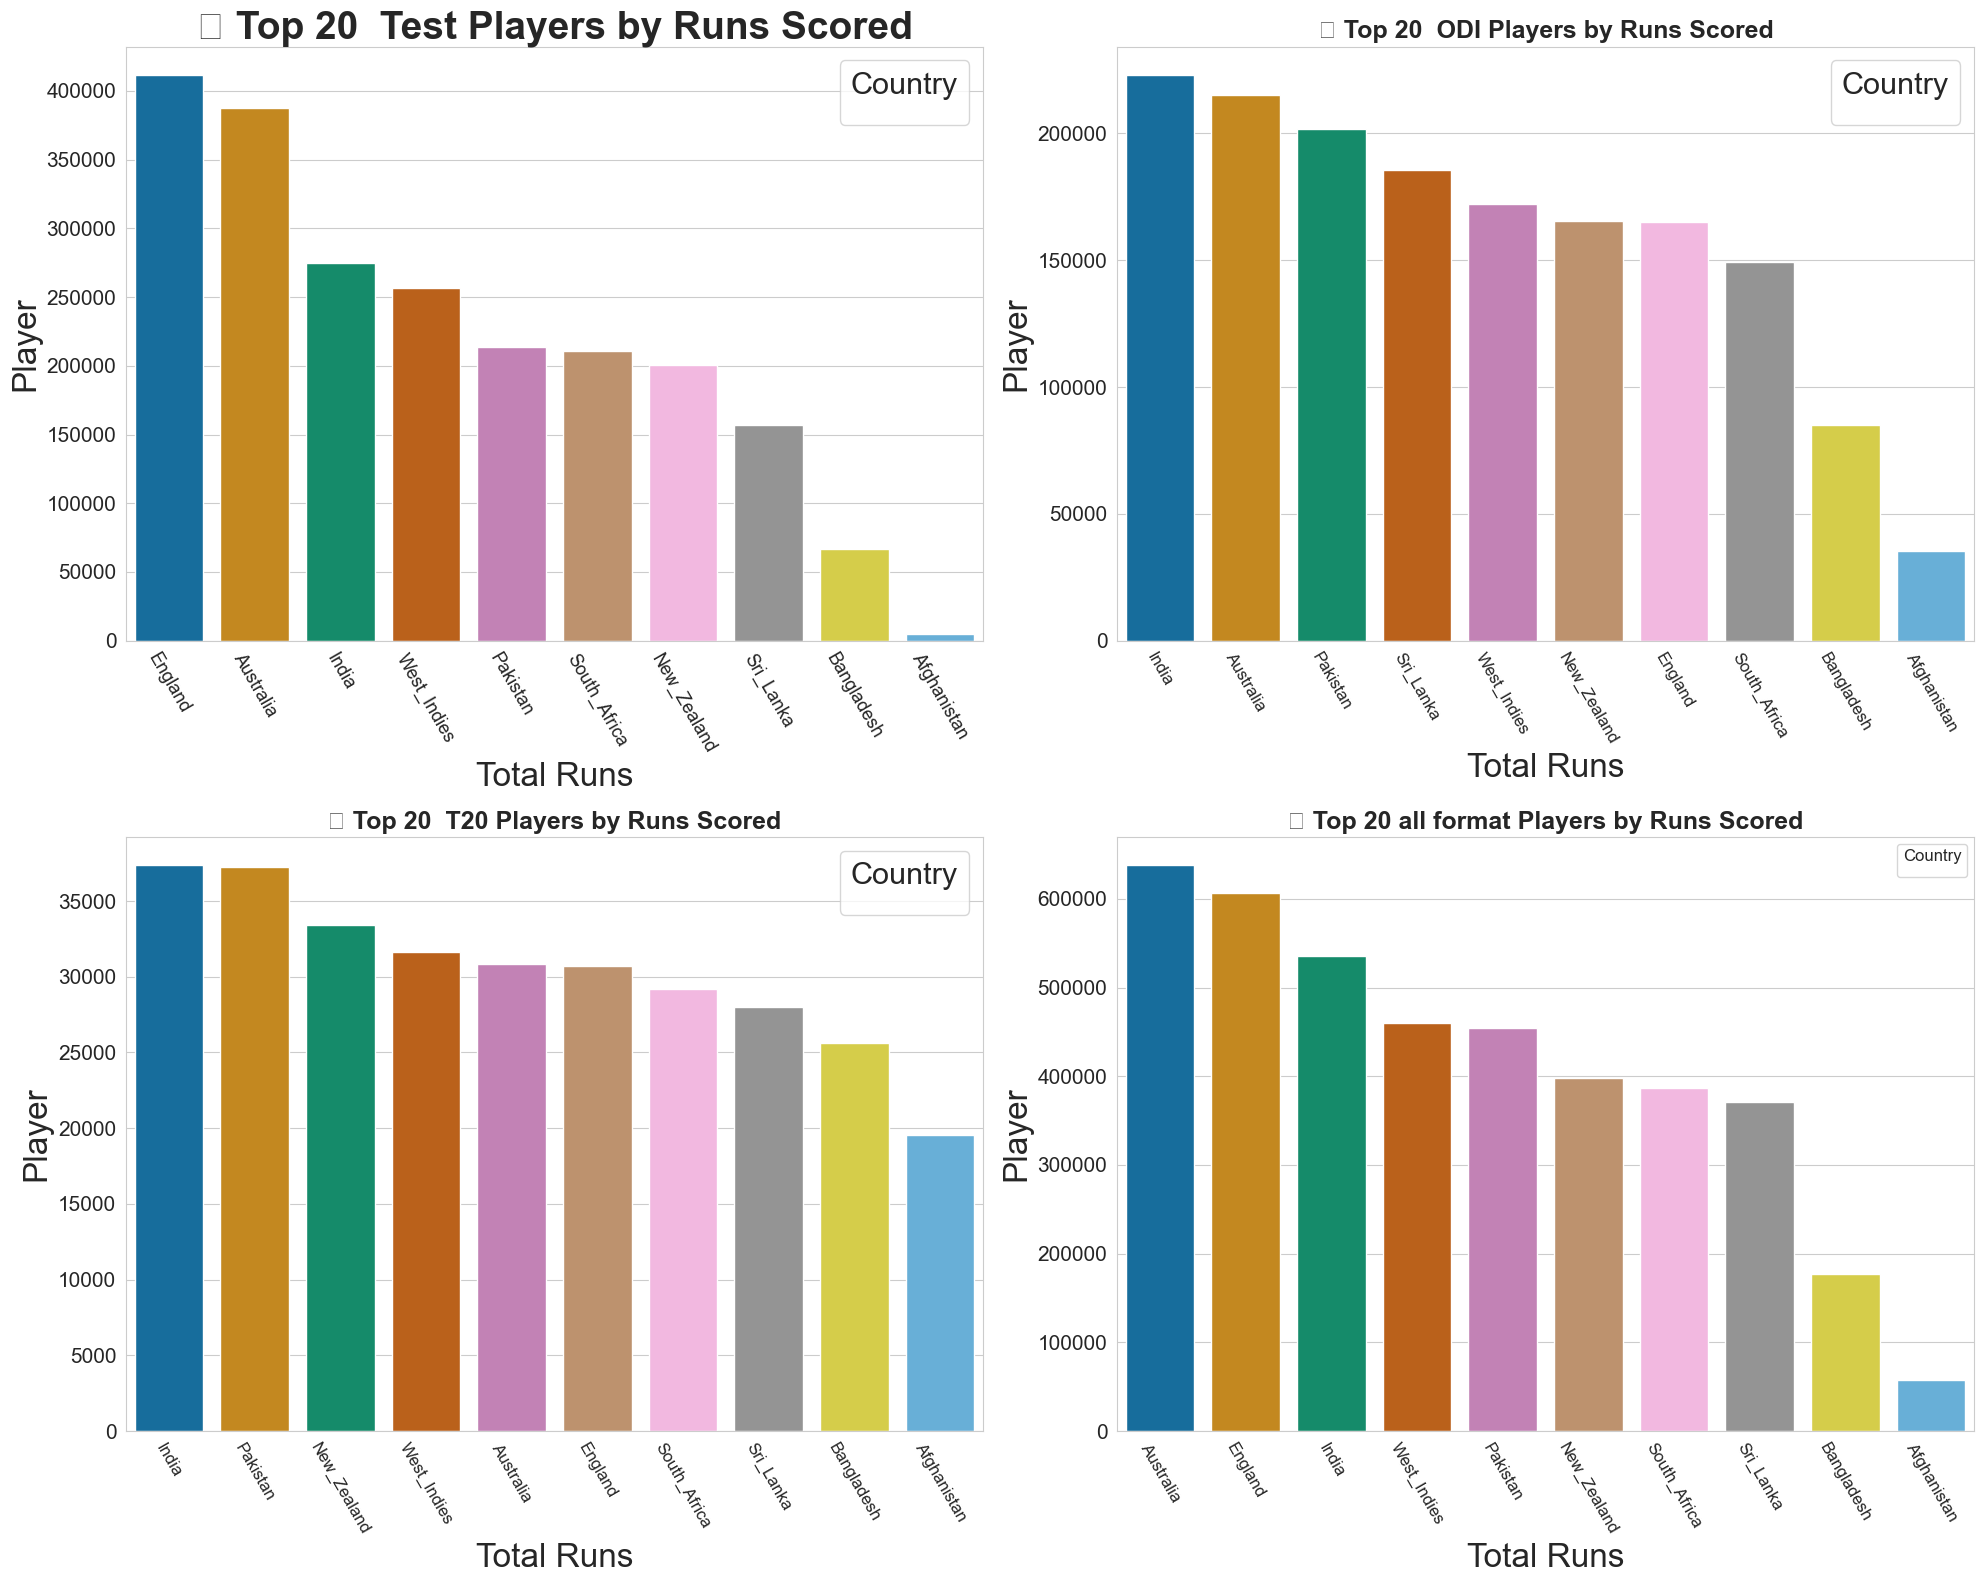

In [313]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 16))
plt.subplot(2,2,4)
sns.barplot(y='Runs', x='Country', hue='Country', data=allFormat.groupby("Country")["Runs"].sum().reset_index().sort_values(by="Runs",ascending=False),orient="v")
plt.title('🏏 Top 20 all format Players by Runs Scored', fontsize=18, weight='bold')
plt.xlabel('Total Runs', fontsize=24)
plt.ylabel('Player', fontsize=24)
plt.xticks(fontsize=12,rotation=300)
plt.yticks(fontsize=15)
plt.legend(title='Country', fontsize=10, title_fontsize=12)
plt.subplot(2,2,2)
sns.barplot(y='Runs', x='Country', hue='Country', data=df[df.Format=="ODI"].groupby("Country")["Runs"].sum().reset_index().sort_values(by="Runs",ascending=False),orient="v")
plt.title('🏏 Top 20  ODI Players by Runs Scored', fontsize=18, weight='bold')
plt.xlabel('Total Runs', fontsize=24)
plt.ylabel('Player', fontsize=24)
plt.xticks(fontsize=12,rotation=300)
plt.yticks(fontsize=15)
plt.legend(title='Country', fontsize=20, title_fontsize=22)
plt.subplot(2,2,3)
sns.barplot(y='Runs', x='Country', hue='Country', data=df[df.Format=="T20"].groupby("Country")["Runs"].sum().reset_index().sort_values(by="Runs",ascending=False),orient="v")
plt.title('🏏 Top 20  T20 Players by Runs Scored', fontsize=18, weight='bold')
plt.xlabel('Total Runs', fontsize=24)
plt.ylabel('Player', fontsize=24)
plt.xticks(fontsize=12,rotation=300)
plt.yticks(fontsize=15)
plt.legend(title='Country', fontsize=20, title_fontsize=22)
plt.subplot(2,2,1)
sns.barplot(y='Runs', x='Country', hue='Country', data=df[df.Format=="Test"].groupby("Country")["Runs"].sum().reset_index().sort_values(by="Runs",ascending=False),orient="v")
plt.title('🏏 Top 20  Test Players by Runs Scored', fontsize=28, weight='bold')
plt.xlabel('Total Runs', fontsize=24)
plt.ylabel('Player', fontsize=24)
plt.xticks(fontsize=13,rotation=300)
plt.yticks(fontsize=15)
plt.legend(title='Country', fontsize=20, title_fontsize=22)
plt.tight_layout()


In [34]:
df[df.Format=="Test"].groupby("Country")["Runs"].sum().reset_index().sort_values(by="Runs",ascending=False)

Country    Runs
3      England  411724
1    Australia  387398
4        India  274873
9         West  256572
6     Pakistan  213499
7        South  210891
5          New  200563
8          Sri  157244
2   Bangladesh   66819
0  Afghanistan    4619

In [36]:
import pandas as pd

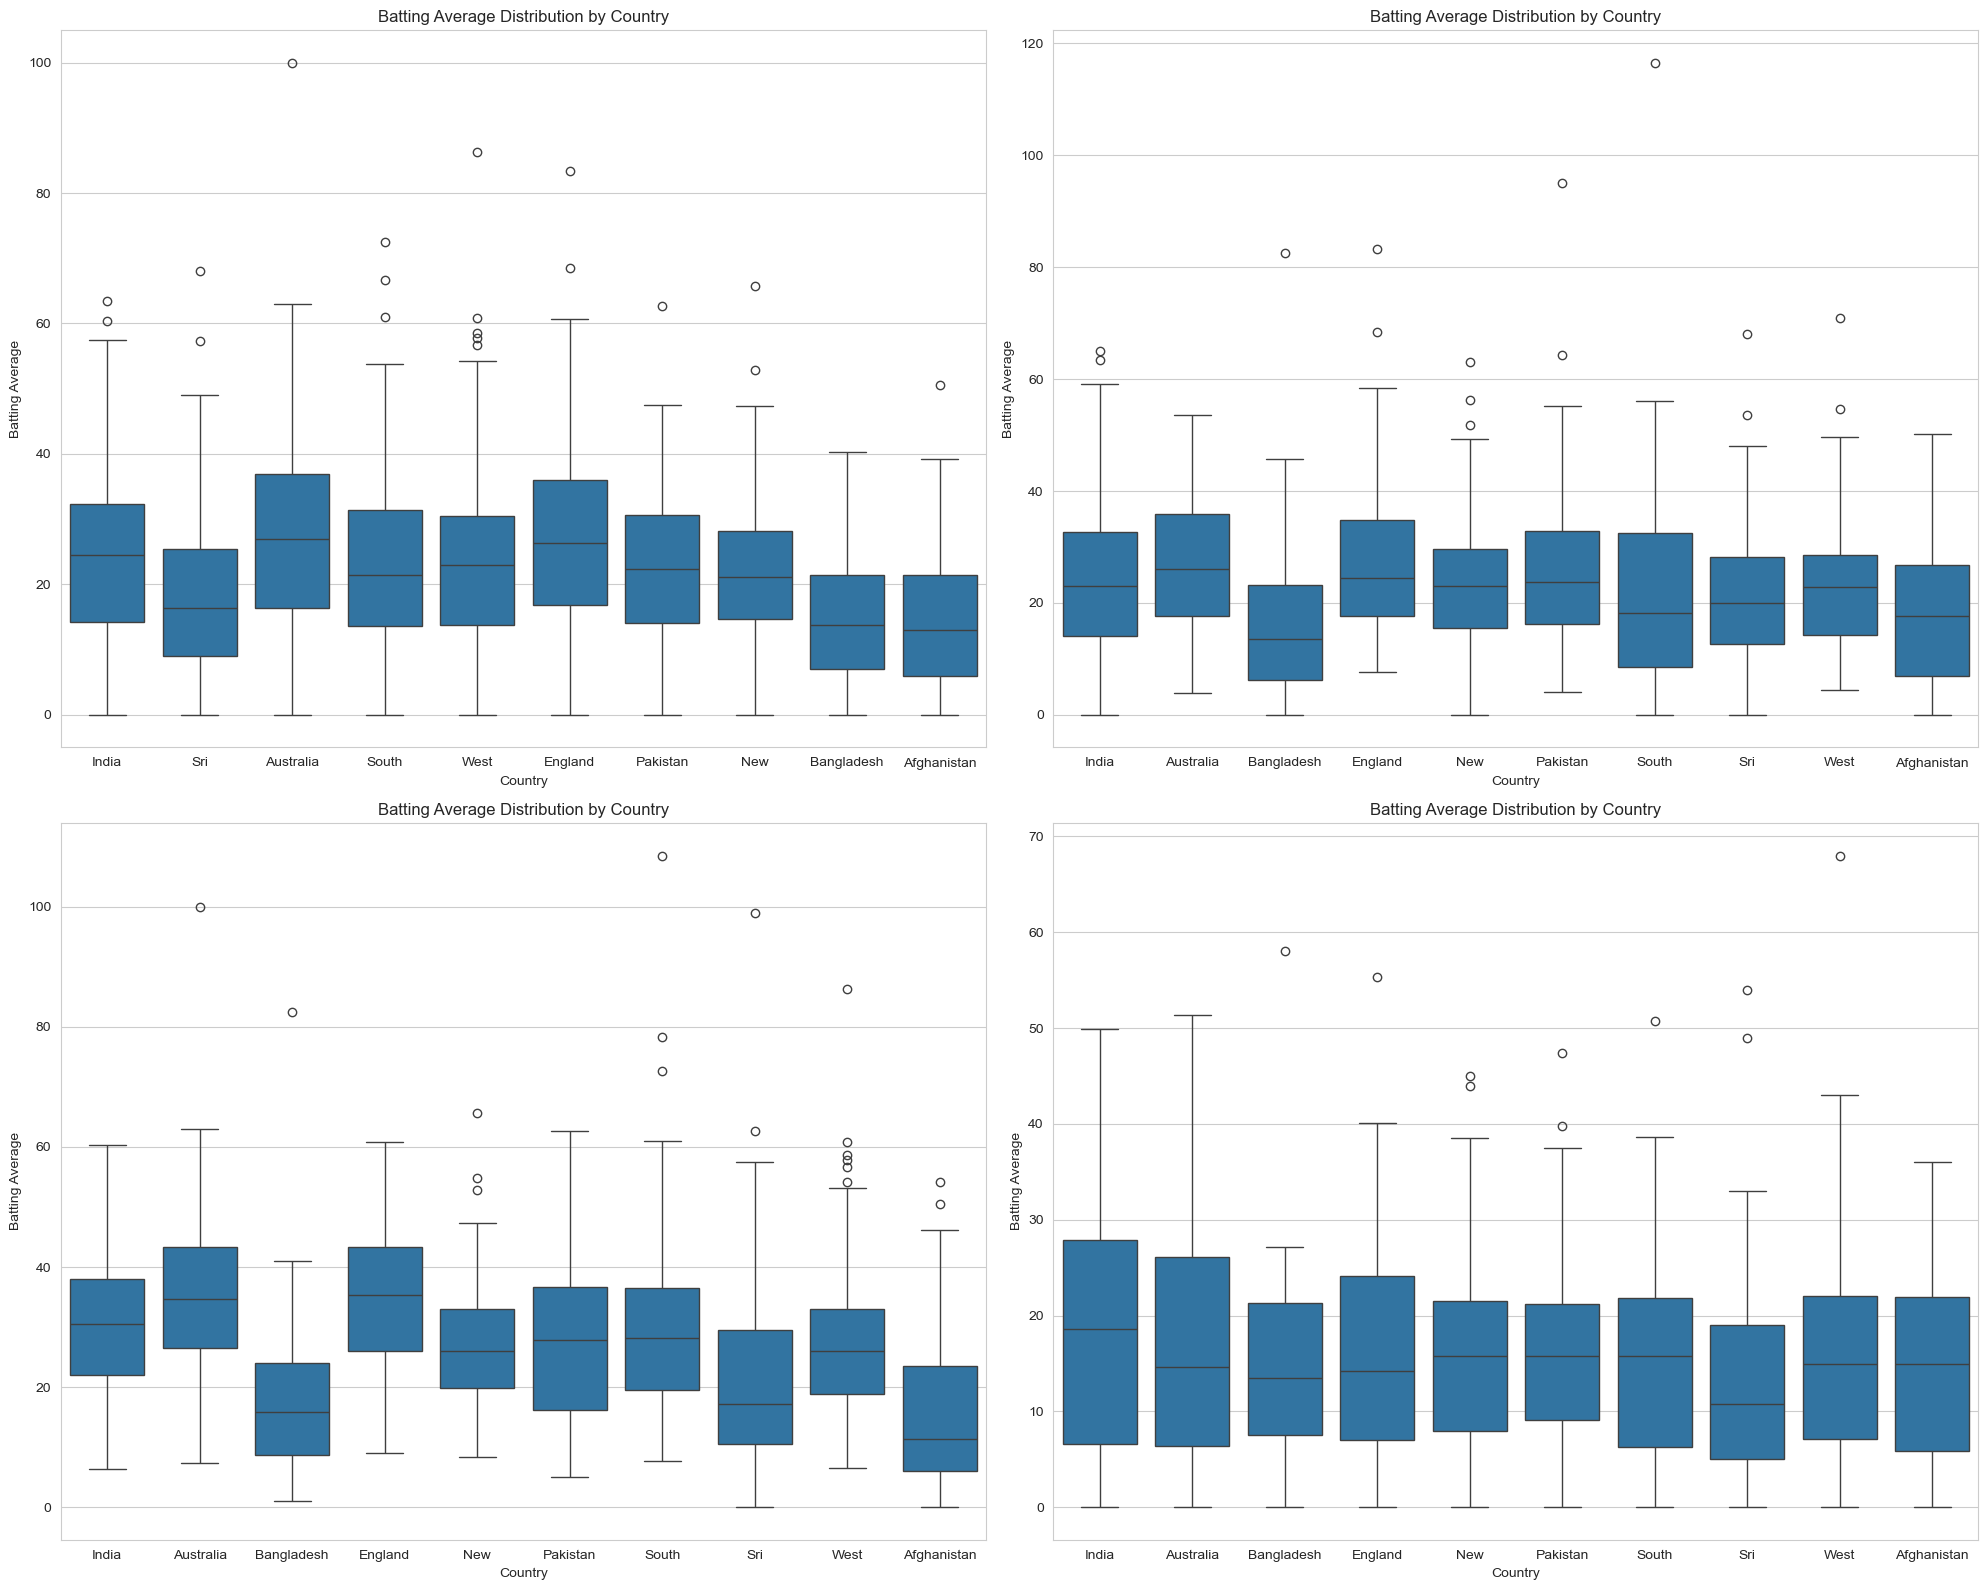

In [37]:
plt.figure(figsize=(20, 16))

plt.subplot(2,2,1)
sns.boxplot(x='Country', y='Average', data=allFormat)
plt.title('Batting Average Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')


plt.subplot(2,2,2)
sns.boxplot(x='Country', y='Average', data=df[df.Format=="ODI"])
plt.title('Batting Average Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')

plt.subplot(2,2,3)

sns.boxplot(x='Country', y='Average', data=df[df.Format=="Test"])
plt.title('Batting Average Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')

plt.subplot(2,2,4)
sns.boxplot(x='Country', y='Average', data=df[df.Format=="T20"])
plt.title('Batting Average Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.tight_layout()
plt.show()

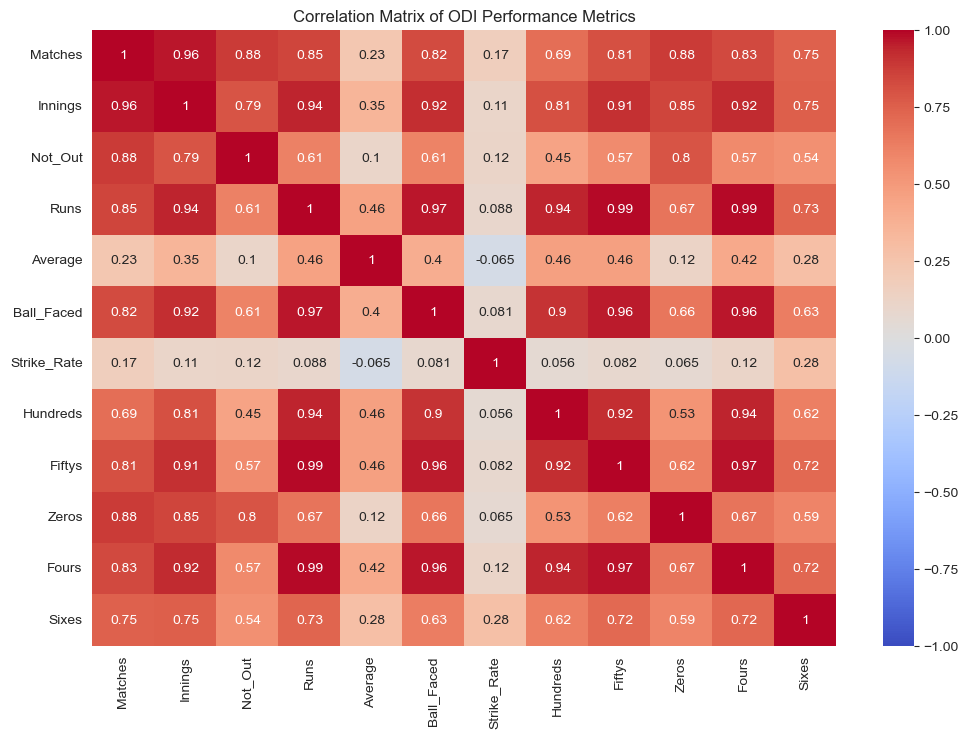

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = allFormat[['Matches', 'Innings', 'Not_Out', 'Runs', 'Average', 'Ball_Faced', 'Strike_Rate', 
           'Hundreds', 'Fiftys', 'Zeros', 'Fours', 'Sixes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ODI Performance Metrics')
plt.show()

In [45]:
df

Country           Player  Matches  Innings  Not_Out   Runs  \
0           India     SR Tendulkar      463      452       41  18426   
1           India          V Kohli      302      290       45  14181   
2           India       SC Ganguly      308      297       23  11221   
3           India        RG Sharma      273      265       36  11168   
4           India         R Dravid      340      314       39  10768   
...           ...              ...      ...      ...      ...    ...   
3648  Afghanistan  Dawlat Ahmadzai        2        1        1      2   
3649  Afghanistan       Aftab Alam       12        5        3      2   
3650  Afghanistan   Yamin Ahmadzai        2        1        1      1   
3651  Afghanistan    Sayed Shirzad        4        1        0      1   
3652  Afghanistan    M Nasim Baras        3        1        0      1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
0               200    44.83       21368        86.23        49      96   
1               183    57.88       15192        93.34        51      74   
2               183    40.95       15235        73.65        22      71   
3               264    48.76       12034        92.80        32      58   
4               153    39.15       15127        71.18        12      82   
...             ...      ...         ...          ...       ...     ...   
3648              2     0.00           3        66.66         0       0   
3649              1     1.00           9        22.22         0       0   
3650              1     0.00           1       100.00         0       0   
3651              1     1.00           2        50.00         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  
0        20   2016    195        1989              2012    ODI  
1        16   1325    152        2008              2025    ODI  
2        16   1104    189        1992              2007    ODI  
3        16   1045    344        2007              2025    ODI  
4        13    942     42        1996              2011    ODI  
...     ...    ...    ...         ...               ...    ...  
3648      0      0      0        2010              2010    T20  
3649      1      0      0        2012              2018    T20  
3650      0      0      0        2015              2015    T20  
3651      0      0      0        2015              2019    T20  
3652      0      0      0        2015              2015    T20  

[3653 rows x 18 columns]

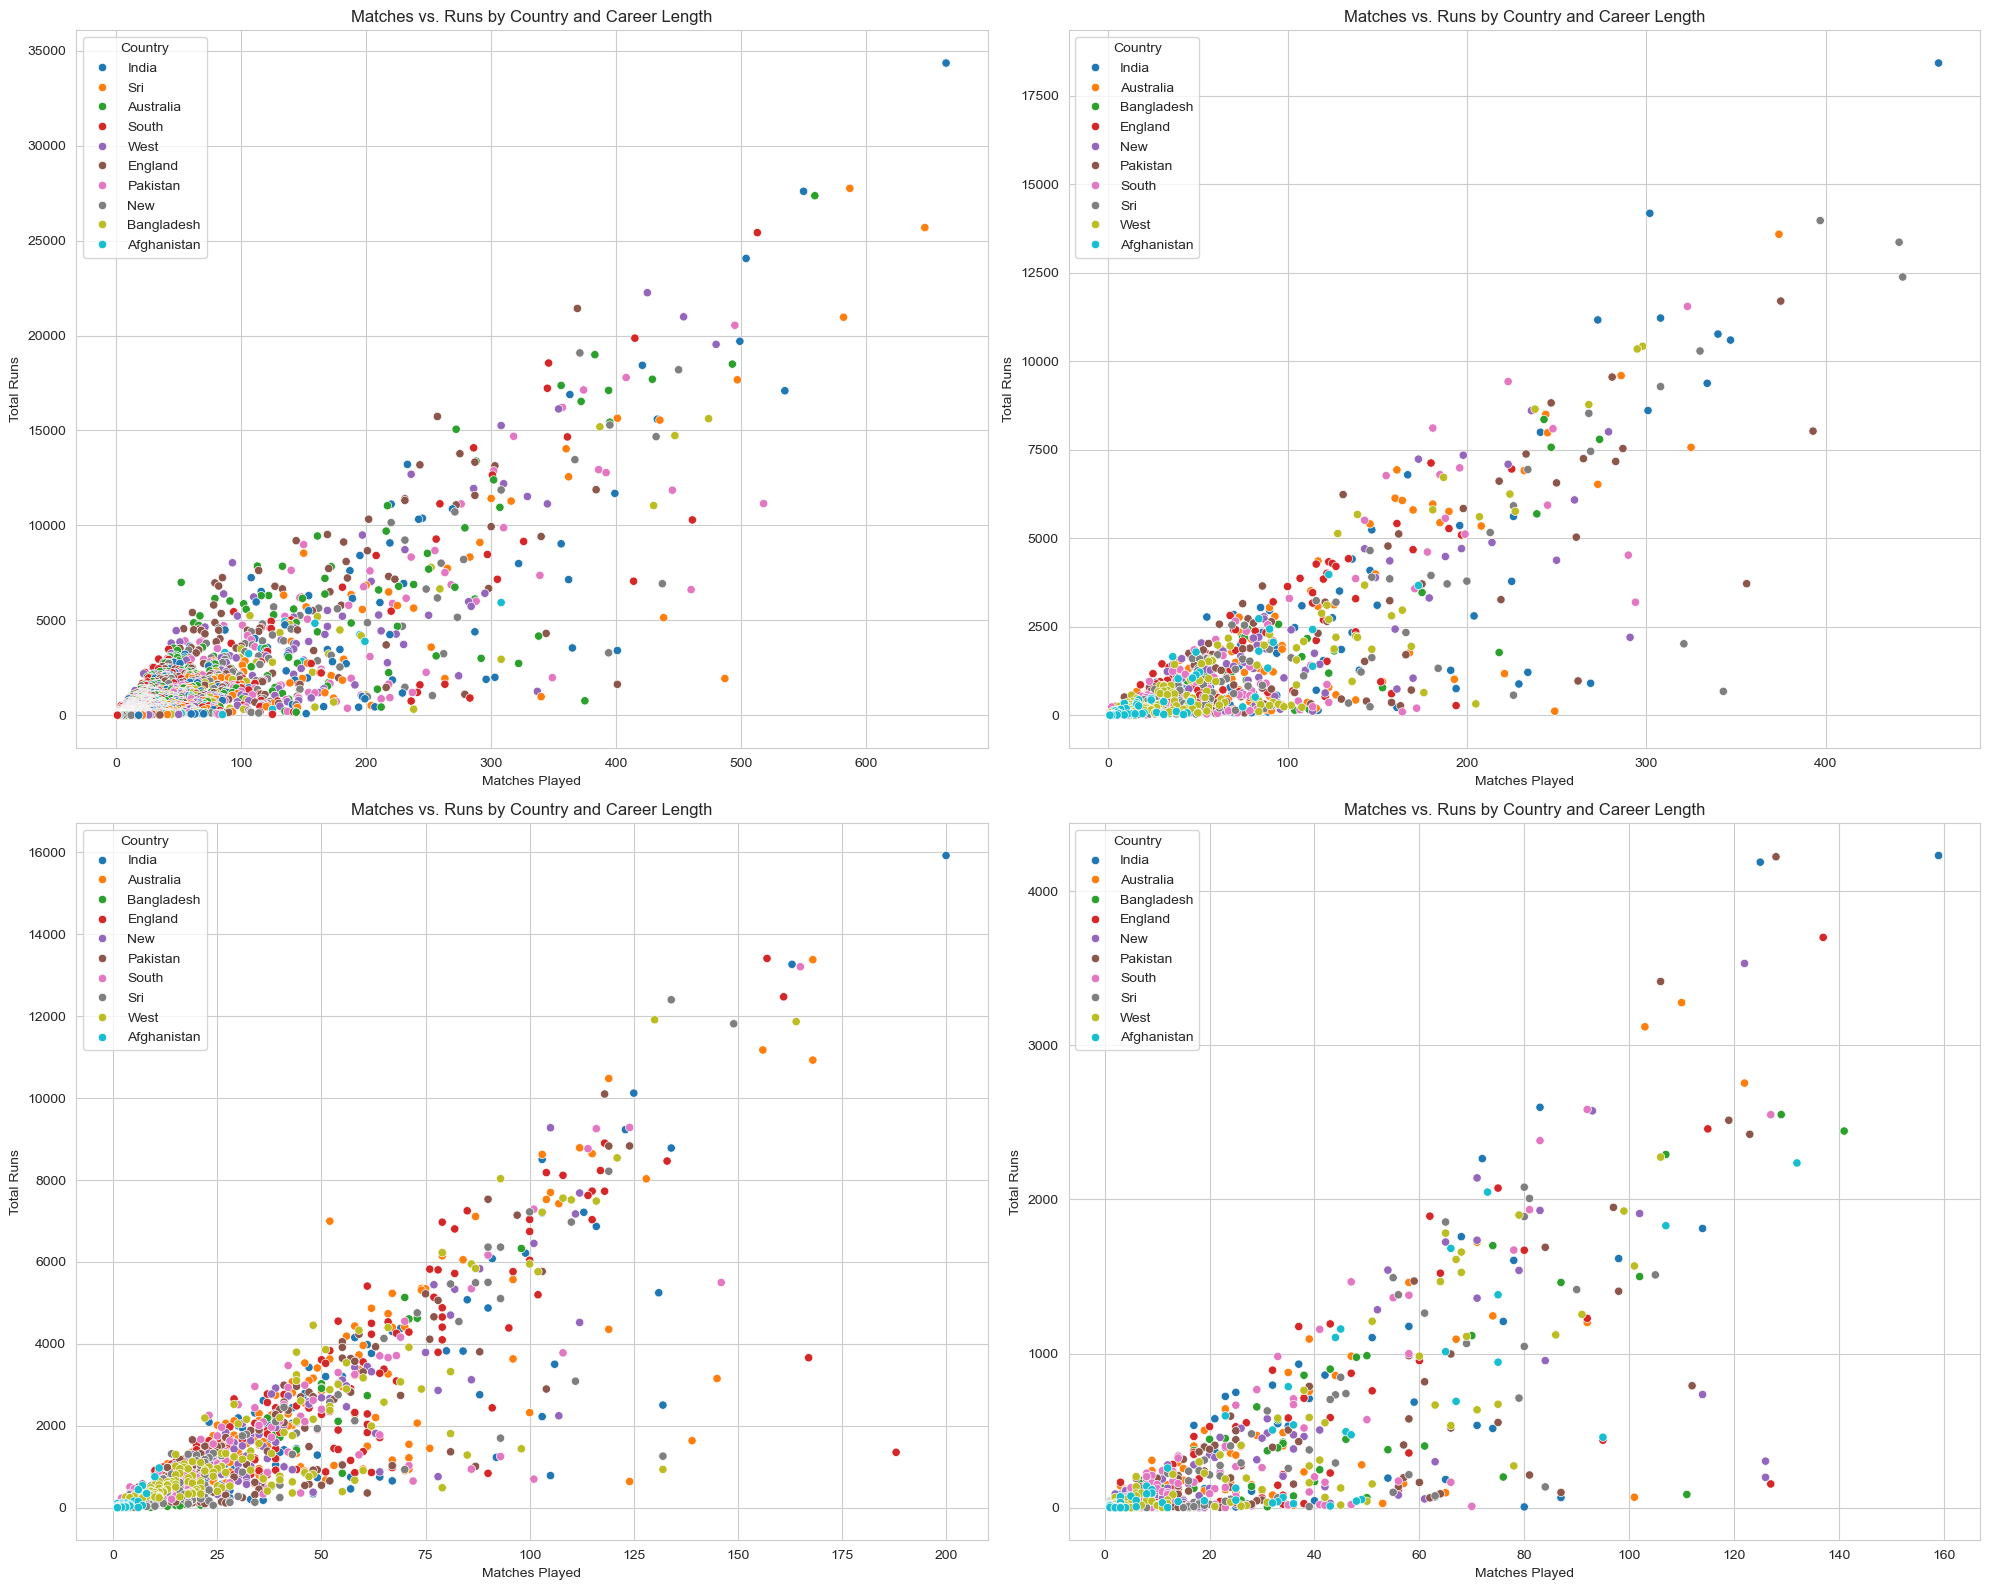

In [47]:
plt.figure(figsize=(20, 16))

plt.subplot(2,2,1)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=allFormat)
plt.title('Matches vs. Runs by Country and Career Length')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')


plt.subplot(2,2,2)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="ODI"])
plt.title('Matches vs. Runs by Country and Career Length')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')

plt.subplot(2,2,3)

sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="Test"])
plt.title('Matches vs. Runs by Country and Career Length')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')

plt.subplot(2,2,4)
sns.scatterplot(x='Matches', y='Runs', hue='Country', sizes=(20, 200), data=df[df.Format=="T20"])
plt.title('Matches vs. Runs by Country and Career Length')
plt.xlabel('Matches Played')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

In [49]:
df

Country           Player  Matches  Innings  Not_Out   Runs  \
0           India     SR Tendulkar      463      452       41  18426   
1           India          V Kohli      302      290       45  14181   
2           India       SC Ganguly      308      297       23  11221   
3           India        RG Sharma      273      265       36  11168   
4           India         R Dravid      340      314       39  10768   
...           ...              ...      ...      ...      ...    ...   
3648  Afghanistan  Dawlat Ahmadzai        2        1        1      2   
3649  Afghanistan       Aftab Alam       12        5        3      2   
3650  Afghanistan   Yamin Ahmadzai        2        1        1      1   
3651  Afghanistan    Sayed Shirzad        4        1        0      1   
3652  Afghanistan    M Nasim Baras        3        1        0      1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
0               200    44.83       21368        86.23        49      96   
1               183    57.88       15192        93.34        51      74   
2               183    40.95       15235        73.65        22      71   
3               264    48.76       12034        92.80        32      58   
4               153    39.15       15127        71.18        12      82   
...             ...      ...         ...          ...       ...     ...   
3648              2     0.00           3        66.66         0       0   
3649              1     1.00           9        22.22         0       0   
3650              1     0.00           1       100.00         0       0   
3651              1     1.00           2        50.00         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  
0        20   2016    195        1989              2012    ODI  
1        16   1325    152        2008              2025    ODI  
2        16   1104    189        1992              2007    ODI  
3        16   1045    344        2007              2025    ODI  
4        13    942     42        1996              2011    ODI  
...     ...    ...    ...         ...               ...    ...  
3648      0      0      0        2010              2010    T20  
3649      1      0      0        2012              2018    T20  
3650      0      0      0        2015              2015    T20  
3651      0      0      0        2015              2019    T20  
3652      0      0      0        2015              2015    T20  

[3653 rows x 18 columns]

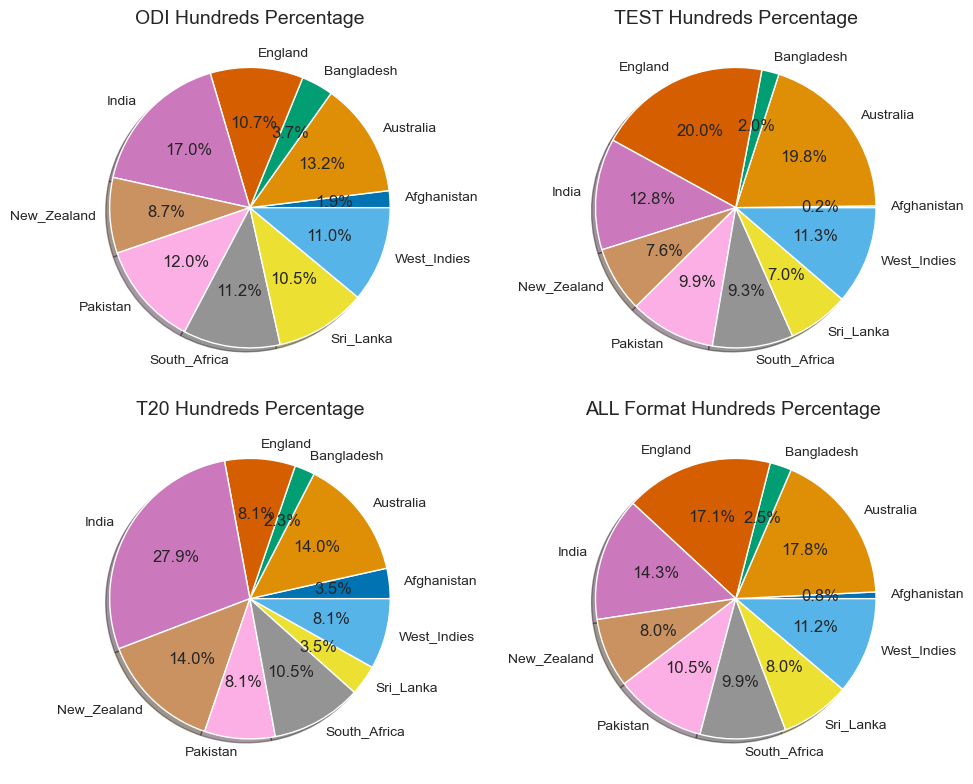

In [199]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.subplot(2,2,4)
lables=allFormat[["Country","Hundreds"]].groupby("Country")["Hundreds"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Hundreds,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("ALL Format Hundreds Percentage ")

plt.subplot(2,2,2)
lables=df[df.Format=="Test"][["Country","Hundreds"]].groupby("Country")["Hundreds"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Hundreds,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,

)
plt.title("TEST Hundreds Percentage")
plt.subplot(2,2,3)
lables=df[df.Format=="T20"][["Country","Hundreds"]].groupby("Country")["Hundreds"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Hundreds,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("T20 Hundreds Percentage")
plt.subplot(2,2,1)
lables=df[df.Format=="ODI"][["Country","Hundreds"]].groupby("Country")["Hundreds"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Hundreds,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("ODI Hundreds Percentage")
plt.tight_layout()


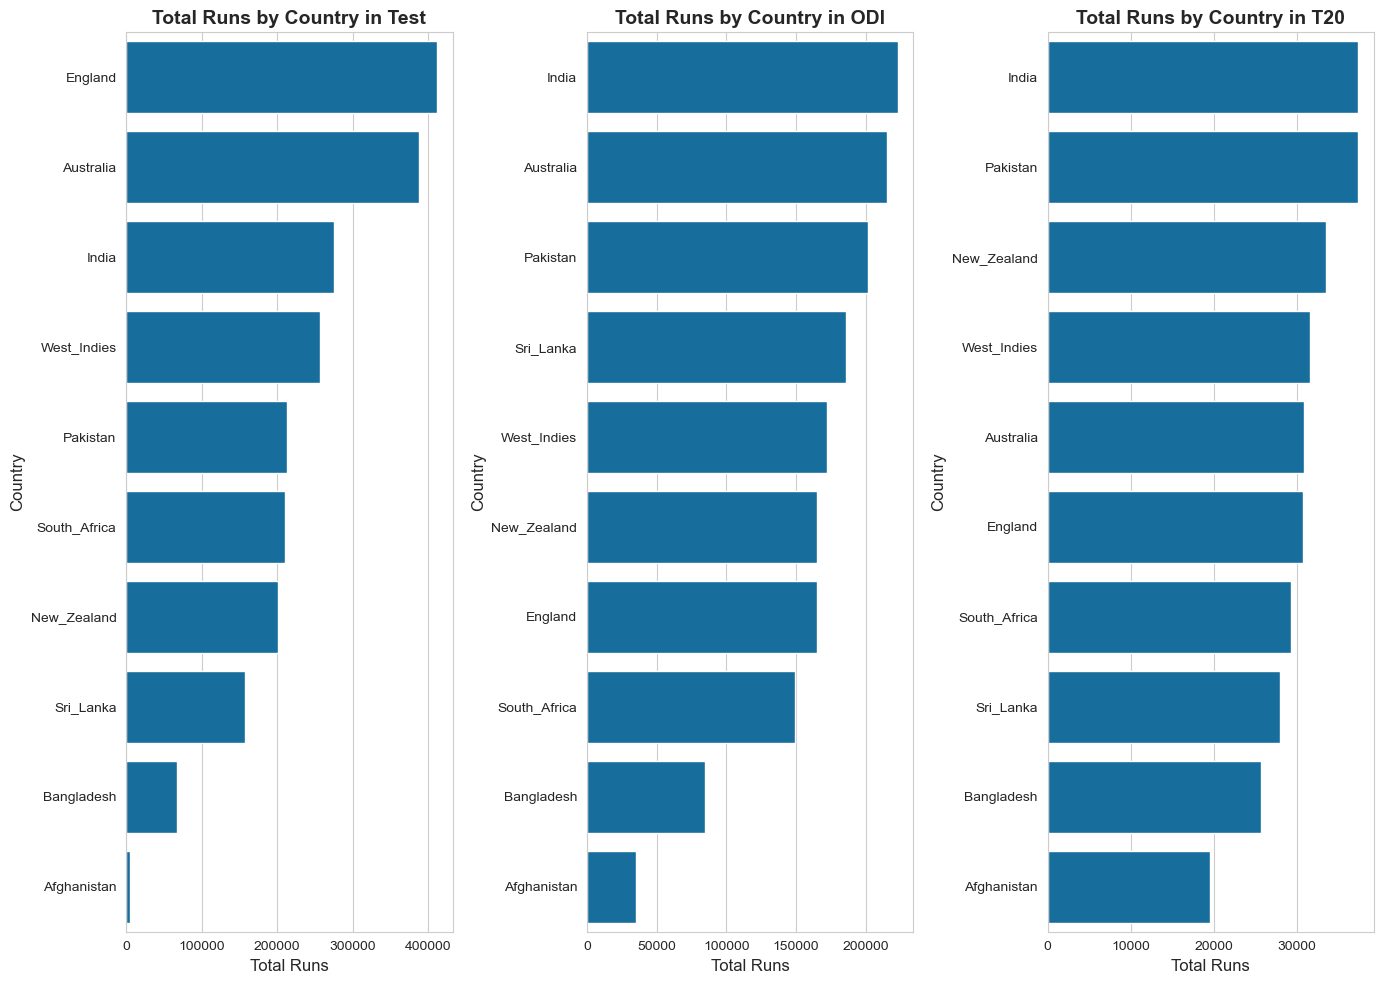

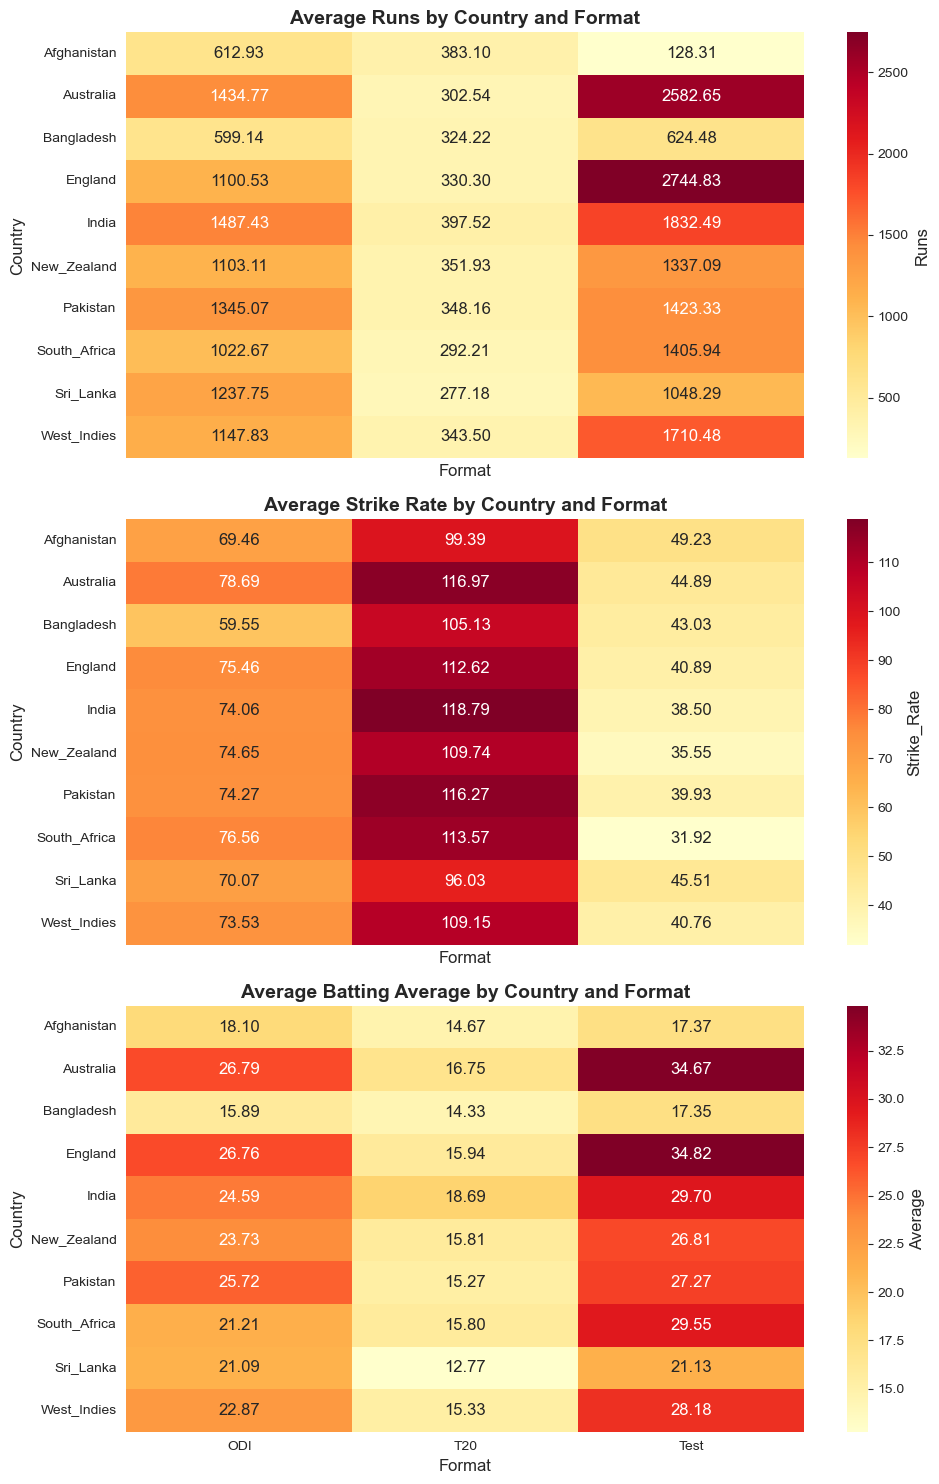

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")
plt.rcParams.update({'font.size': 12})

# 1. Bar Chart: Total Runs by Country for Each Format
plt.figure(figsize=(14, 10))
for idx, fmt in enumerate(["Test", "ODI", "T20"], start=1):
    plt.subplot(1, 3, idx)
    country_runs = df[df['Format'] == fmt].groupby('Country')['Runs'].sum().sort_values(ascending=False)
    if country_runs.empty:
        plt.text(0.5, 0.5, f"No Data for {fmt}", ha='center', va='center', fontsize=12, color='red')
        plt.title(f'Total Runs by Country in {fmt}', fontsize=14, weight='bold')
        continue
    sns.barplot(x=country_runs.values, y=country_runs.index)
    plt.title(f'Total Runs by Country in {fmt}', fontsize=14, weight='bold')
    plt.xlabel('Total Runs', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Heatmap: Average Runs, Strike Rate, and Batting Average by Country and Format
pivot_data = df.pivot_table(values=['Runs', 'Strike_Rate', 'Average'], index='Country', columns='Format', aggfunc='mean')
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
metrics = ['Runs', 'Strike_Rate', 'Average']
titles = ['Average Runs by Country and Format', 'Average Strike Rate by Country and Format', 'Average Batting Average by Country and Format']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    sns.heatmap(pivot_data[metric], annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[idx], cbar_kws={'label': metric})
    axes[idx].set_title(title, fontsize=14, weight='bold')
    axes[idx].set_xlabel('Format', fontsize=12)
    axes[idx].set_ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()

In [329]:
df[df.Player=="Babar Azam"]

Country      Player  Matches  Innings  Not_Out  Runs  Highest_score  \
752   Pakistan  Babar Azam      131      128       15  6235            158   
2112  Pakistan  Babar Azam       59      108        9  4235            196   
3202  Pakistan  Babar Azam      128      121       15  4223            122   

      Average  Ball_Faced  Strike_Rate  ...  Fiftys  Zeros  Fours  Sixes  \
752     55.17        7089        87.95  ...      37      4    574     67   
2112    42.77        7788        54.37  ...      29      8    494     23   
3202    39.83        3268       129.22  ...      36      7    447     73   

      Start_Year  End/Current_Year  Format Careerspan  Career_Span   Status  
752         2015              2025     ODI         10           10   Active  
2112        2016              2025    Test          9            9   Active  
3202        2016              2024     T20          8            8  Retired  

[3 rows x 21 columns]

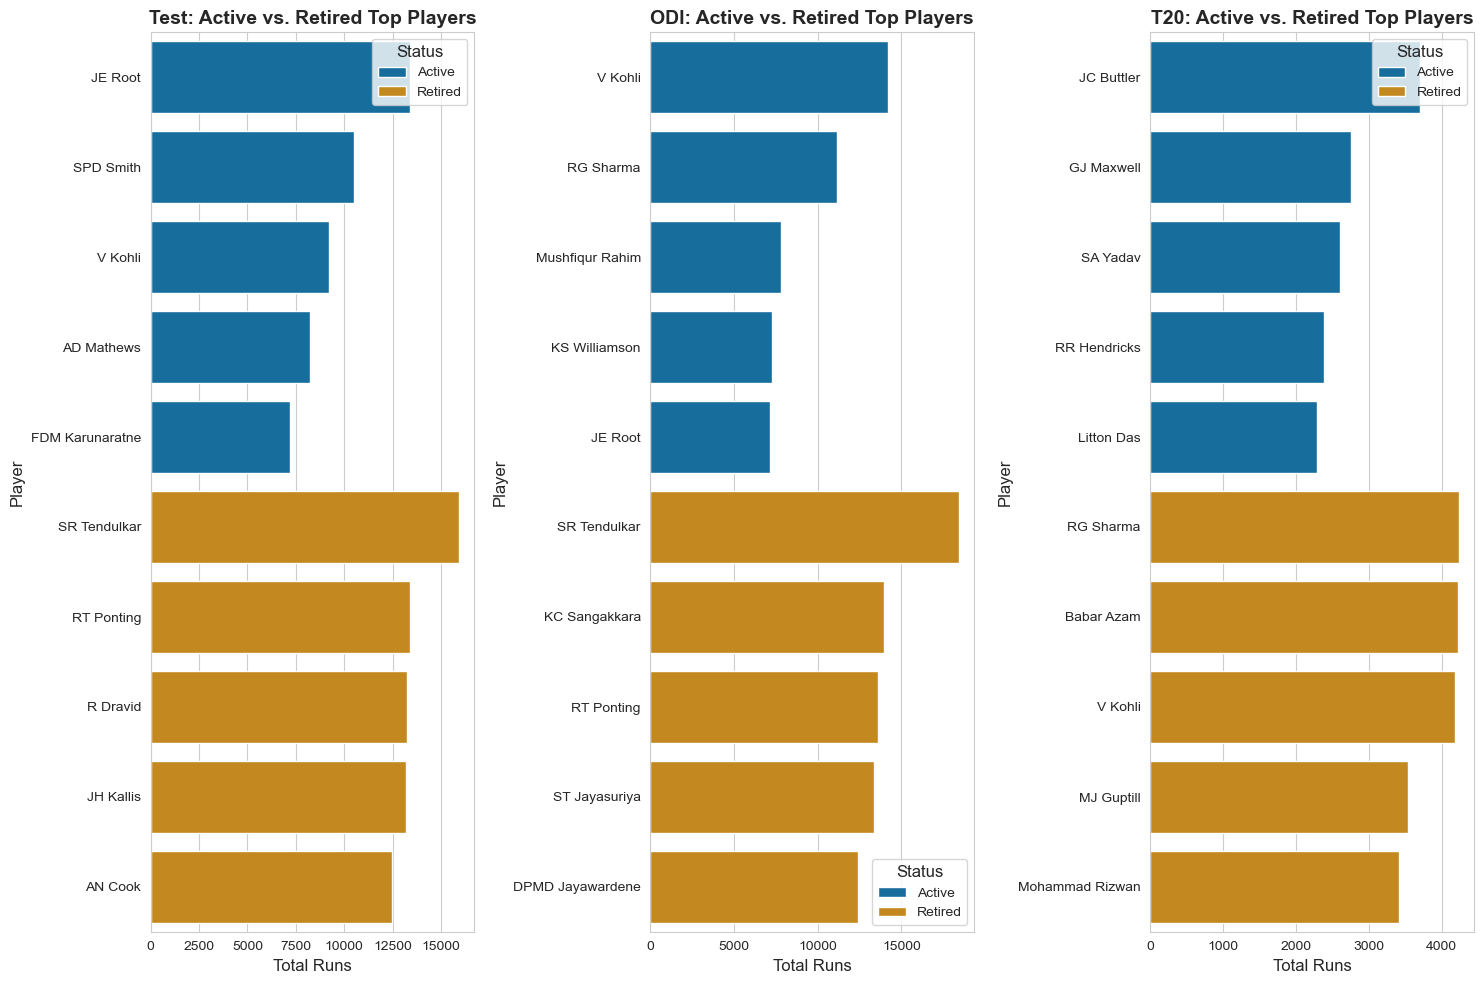

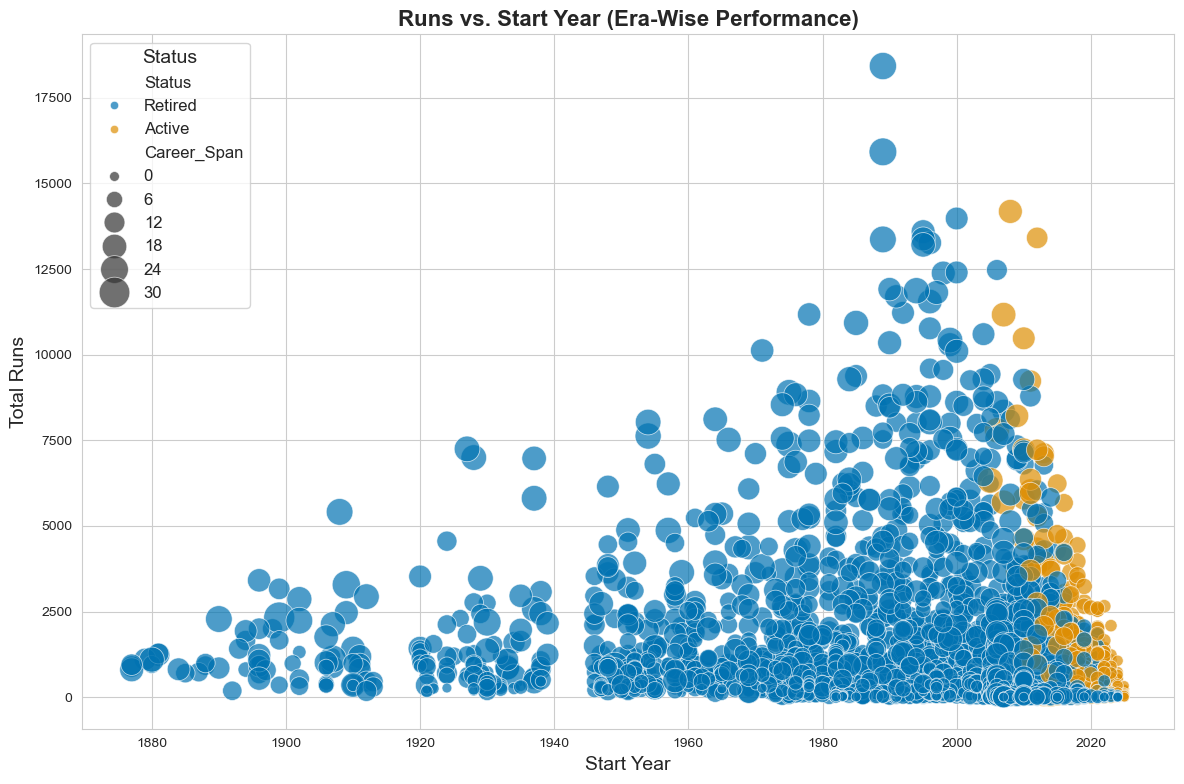

In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")
plt.rcParams.update({'font.size': 12})

# Define active vs. retired status
df['Status'] = df['End/Current_Year'].apply(lambda x: 'Active' if x == 2025 else 'Retired')
df['Career_Span'] = df['End/Current_Year'] - df['Start_Year']

# Prepare datasets for top players by format
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).copy()
}

# 1. Bar Chart: Top 5 Active vs. Retired Players by Runs in Each Format
plt.figure(figsize=(15, 10))
for idx, fmt in enumerate(["Test", "ODI", "T20"], start=1):
    plt.subplot(1, 3, idx)
    data = formats[fmt]
    if data.empty:
        plt.text(0.5, 0.5, f"No Data for {fmt}", ha='center', va='center', fontsize=12, color='red')
        plt.title(f'{fmt}: Active vs. Retired Top Players', fontsize=14, weight='bold')
        continue
    active = data[data['Status'] == 'Active'].head(5)
    retired = data[data['Status'] == 'Retired'].head(5)
    combined = pd.concat([active, retired]).head(10)  # Combine for plotting
    sns.barplot(x='Runs', y='Player', hue='Status', data=combined)
    plt.title(f'{fmt}: Active vs. Retired Top Players', fontsize=14, weight='bold')
    plt.xlabel('Total Runs', fontsize=12)
    plt.ylabel('Player', fontsize=12)
    plt.legend(title='Status', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Runs vs. Start Year to Show Era-Wise Performance
plt.figure(figsize=(12, 8))
if not df.empty:
    sns.scatterplot(
        x='Start_Year',
        y='Runs',
        hue='Status',
        size='Career_Span',
        sizes=(50, 500),
        data=df,
        alpha=0.7
    )
    plt.title('Runs vs. Start Year (Era-Wise Performance)', fontsize=16, weight='bold')
    plt.xlabel('Start Year', fontsize=14)
    plt.ylabel('Total Runs', fontsize=14)
    plt.legend(title='Status', fontsize=12, title_fontsize=14)
else:
    plt.text(0.5, 0.5, "No Data Available", ha='center', va='center', fontsize=12, color='red')
plt.tight_layout()
plt.show()

In [68]:
df

Country           Player  Matches  Innings  Not_Out   Runs  \
0                   India     SR Tendulkar      463      452       41  18426   
1                   India     SR Tendulkar      200      329       33  15921   
2                   India          V Kohli      302      290       45  14181   
3         Sri_Lanka_Lanka    KC Sangakkara      397      373       40  13975   
4               Australia       RT Ponting      374      364       39  13589   
...                   ...              ...      ...      ...      ...    ...   
3648      Sri_Lanka_Lanka  SMLD Samarakoon        1        1        0      1   
3649  South_Africa_Africa     OEG Baartman       12        2        0      1   
3650  South_Africa_Africa     HH Dippenaar        1        1        0      1   
3651  South_Africa_Africa         N Burger        5        1        0      1   
3652          Afghanistan    M Nasim Baras        3        1        0      1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
0               200    44.83       21368        86.23        49      96   
1               248    53.78       29437        54.04        51      68   
2               183    57.88       15192        93.34        51      74   
3               169    41.96       17715        78.88        25      90   
4               164    41.81       16944        80.19        29      82   
...             ...      ...         ...          ...       ...     ...   
3648              1     1.00           3        33.33         0       0   
3649              1     0.50           6        16.66         0       0   
3650              1     1.00           5        20.00         0       0   
3651              1     1.00           3        33.33         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  Careerspan  
0        20   2016    195        1989              2012    ODI          23  
1        14   2058     69        1989              2013   Test          24  
2        16   1325    152        2008              2025    ODI          17  
3        15   1349     86        2000              2015    ODI          15  
4        20   1223    159        1995              2012    ODI          17  
...     ...    ...    ...         ...               ...    ...         ...  
3648      0      0      0        2023              2023    T20           0  
3649      1      0      0        2024              2024    T20           0  
3650      0      0      0        2006              2006    T20           0  
3651      0      0      0        2023              2025    T20           2  
3652      0      0      0        2015              2015    T20           0  

[3653 rows x 19 columns]

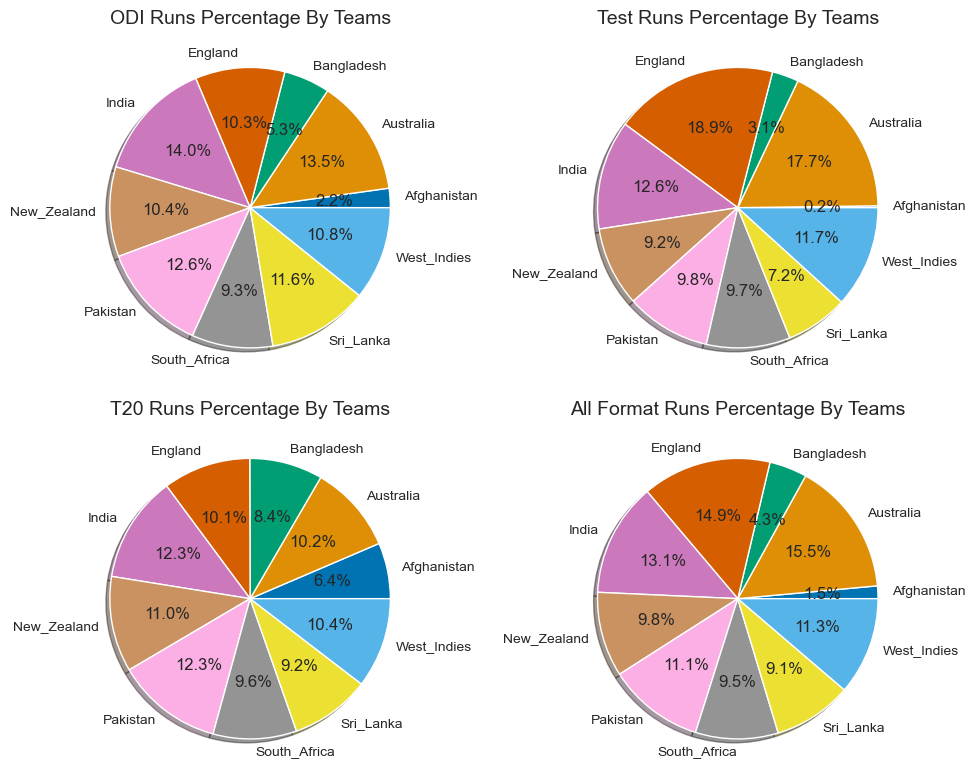

In [203]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.subplot(2,2,4)
lables=allFormat[["Country","Runs"]].groupby("Country")["Runs"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Runs,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("All Format Runs Percentage By Teams")
plt.subplot(2,2,2)
lables=df[df.Format=="Test"][["Country","Runs"]].groupby("Country")["Runs"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Runs,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("Test Runs Percentage By Teams")
plt.subplot(2,2,3)
lables=df[df.Format=="T20"][["Country","Runs"]].groupby("Country")["Runs"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Runs,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("T20 Runs Percentage By Teams")
plt.subplot(2,2,1)
lables=df[df.Format=="ODI"][["Country","Runs"]].groupby("Country")["Runs"].sum()
lables=lables.reset_index()
plt.pie(
    lables.Runs,
    
    labels=lables.Country,
    autopct='%1.1f%%',
    shadow=True,
   
)
plt.title("ODI Runs Percentage By Teams")
plt.tight_layout()


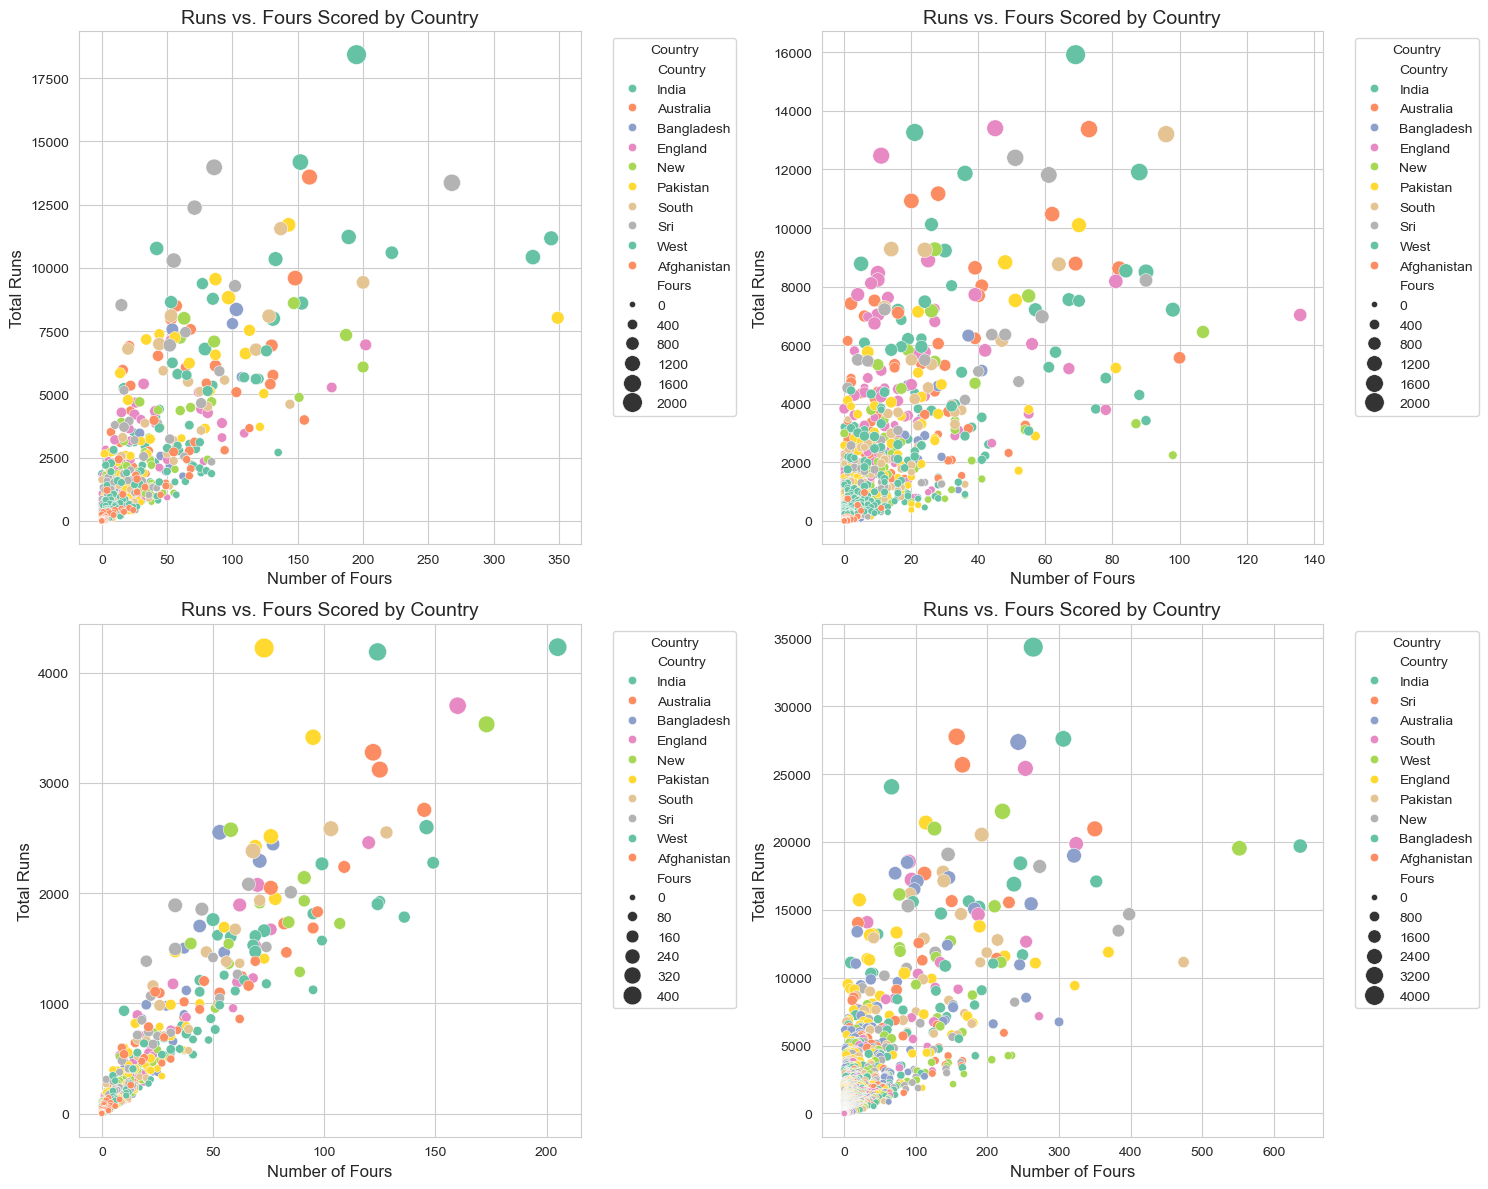

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))
plt.subplot(2,2,4)
sns.scatterplot(x='Sixes', y='Runs', hue='Country', size='Fours', sizes=(20, 200), data=allFormat, palette='Set2')
plt.title('Runs vs. Fours Scored by Country', fontsize=14)
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2,2,2)
sns.scatterplot(x='Sixes', y='Runs', hue='Country', size='Fours', sizes=(20, 200), data=df[df.Format=="Test"], palette='Set2')
plt.title('Runs vs. Fours Scored by Country', fontsize=14)
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(2,2,3)
sns.scatterplot(x='Sixes', y='Runs', hue='Country', size='Fours', sizes=(20, 200), data=df[df.Format=="T20"], palette='Set2')
plt.title('Runs vs. Fours Scored by Country', fontsize=14)
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(2,2,1)
sns.scatterplot(x='Sixes', y='Runs', hue='Country', size='Fours', sizes=(20, 200), data=df[df.Format=="ODI"], palette='Set2')
plt.title('Runs vs. Fours Scored by Country', fontsize=14)
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


In [58]:
df

Country           Player  Matches  Innings  Not_Out   Runs  \
0           India     SR Tendulkar      463      452       41  18426   
1           India          V Kohli      302      290       45  14181   
2           India       SC Ganguly      308      297       23  11221   
3           India        RG Sharma      273      265       36  11168   
4           India         R Dravid      340      314       39  10768   
...           ...              ...      ...      ...      ...    ...   
3648  Afghanistan  Dawlat Ahmadzai        2        1        1      2   
3649  Afghanistan       Aftab Alam       12        5        3      2   
3650  Afghanistan   Yamin Ahmadzai        2        1        1      1   
3651  Afghanistan    Sayed Shirzad        4        1        0      1   
3652  Afghanistan    M Nasim Baras        3        1        0      1   

      Highest_score  Average  Ball_Faced  Strike_Rate  Hundreds  Fiftys  \
0               200    44.83       21368        86.23        49      96   
1               183    57.88       15192        93.34        51      74   
2               183    40.95       15235        73.65        22      71   
3               264    48.76       12034        92.80        32      58   
4               153    39.15       15127        71.18        12      82   
...             ...      ...         ...          ...       ...     ...   
3648              2     0.00           3        66.66         0       0   
3649              1     1.00           9        22.22         0       0   
3650              1     0.00           1       100.00         0       0   
3651              1     1.00           2        50.00         0       0   
3652              1     1.00           2        50.00         0       0   

      Zeros  Fours  Sixes  Start_Year  End/Current_Year Format  
0        20   2016    195        1989              2012    ODI  
1        16   1325    152        2008              2025    ODI  
2        16   1104    189        1992              2007    ODI  
3        16   1045    344        2007              2025    ODI  
4        13    942     42        1996              2011    ODI  
...     ...    ...    ...         ...               ...    ...  
3648      0      0      0        2010              2010    T20  
3649      1      0      0        2012              2018    T20  
3650      0      0      0        2015              2015    T20  
3651      0      0      0        2015              2019    T20  
3652      0      0      0        2015              2015    T20  

[3653 rows x 18 columns]

In [63]:
allFormat[allFormat.Runs>25000 & allFormat.Hundreds>60 ]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
# Calculate 90th percentile for Runs
p90_runs = allFormat['Runs'].quantile(0.10)


top_players = df[df['Runs'] > p90_runs][['Player', 'Country', 'Runs']]

print("90th Percentile of Runs:", p90_runs)
print(top_players)


90th Percentile of Runs: 27.5
                   Player      Country   Runs
0            SR Tendulkar        India  18426
1                 V Kohli        India  14181
2              SC Ganguly        India  11221
3               RG Sharma        India  11168
4                R Dravid        India  10768
...                   ...          ...    ...
3633           Noor Ahmad  Afghanistan     41
3634           Amir Hamza  Afghanistan     40
3635  Ijaz Ahmad Ahmadzai  Afghanistan     35
3636           Qais Ahmad  Afghanistan     33
3637         Fareed Ahmad  Afghanistan     32

[3197 rows x 3 columns]


In [67]:
p90_runs

27.5

In [69]:
players=allFormat.shape[0]

In [71]:
allFormat[allFormat.Country=="India"].sort_values("Runs",ascending=False).head(20)

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0     SR Tendulkar      664      782       74  34357            458   
2          V Kohli      550      617       89  27599            559   
6         R Dravid      504      599       71  24064            454   
13       RG Sharma      499      532       65  19700            597   
19      SC Ganguly      421      485       40  18433            422   
28        MS Dhoni      535      523      141  17092            463   
29        V Sehwag      363      431       15  16892            606   
36    M Azharuddin      433      455       63  15593            352   
53     SM Gavaskar      233      316       30  13214            339   
68    Yuvraj Singh      399      388       54  11686            396   
79      VVS Laxman      220      308       41  11119            412   
84        S Dhawan      269      288       14  10867            425   
86   DB Vengsarkar      245      305       41  10376            271   
88       G Gambhir      242      283       18  10324            431   
105       KL Rahul      219      256       29   9076            421   
106    N Kapil Dev      356      382       54   9031            338   
114      AM Rahane      195      251       17   8414            360   
122       SK Raina      322      291       48   7988            337   
132       NS Sidhu      187      205       10   7615            335   
138      CA Pujara      108      181       11   7246            233   

     Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes Country  Average  \
0         50817       100     164     34   4076    264   India    36.20   
2         34856        82     143     38   2721    306   India    51.14   
6         46332        48     145     20   2593     66   India    40.93   
13        22575        49     108     34   1901    637   India    40.46   
19        29305        38     106     29   2004    246   India    41.56   
28        21695        15     108     21   1469    352   India    41.97   
29        18272        38      70     31   2354    237   India    35.56   
36        22561        29      79     14   1342     96   India    40.98   
53        19150        35      72     20   1142     47   India    43.12   
68        13986        17      71     26   1233    249   India    32.80   
79        21067        23      66     17   1357      9   India    38.36   
84        12286        24      55     11   1349    141   India    37.55   
86        15989        18      58     22    737     41   India    38.43   
88        14994        20      63     20   1188     37   India    36.35   
105       12245        19      59     17    880    192   India    40.90   
106        9171         9      41     29    848    128   India    27.42   
114       14354        15      51     18    903     74   India    31.52   
122        8640         7      48     25    721    182   India    30.32   
132       13464        15      48     16    693     82   India    39.61   
138       16347        19      35     14    867     16   India    26.90   

     Strike_Rate  
0          74.53  
2          95.32  
6          87.11  
13         96.91  
19         62.45  
28         90.79  
29        110.67  
36         65.92  
53         52.80  
68         93.93  
79         60.30  
84         94.88  
86         54.64  
88         85.25  
105        93.29  
106        87.20  
114        80.47  
122        93.84  
132        57.02  
138        41.80

In [73]:
for x in ['India', 'Australia', 'Bangladesh', 'England', 'New', 'Pakistan',
       'South', 'Sri', 'West', 'Afghanistan']:
    
    r=allFormat[allFormat.Country==x].sort_values("Runs",ascending=False).head(20)
    h=allFormat[allFormat.Country==x].sort_values("Hundreds",ascending=False).head(20)
    f=allFormat[allFormat.Country==x].sort_values("Fiftys",ascending=False).head(20)
    fo=allFormat[allFormat.Country==x].sort_values("Fours",ascending=False).head(20)
    s=allFormat[allFormat.Country==x].sort_values("Sixes",ascending=False).head(20)
    a=allFormat[allFormat.Country==x].sort_values("Average",ascending=False)
    a=a[a.Matches>300].head(20)
    
    sr=allFormat[allFormat.Country==x].sort_values("Strike_Rate",ascending=False)
    sr=sr[sr.Matches>=300].head(20)
    data=allFormat[(allFormat['Player'].isin(r['Player'])) & (allFormat['Player'].isin(h['Player']))&(allFormat['Player'].isin(f['Player']))&(allFormat['Player'].isin(fo['Player']))&(allFormat['Player'].isin(s['Player']))
&(allFormat['Player'].isin(a['Player']))&(allFormat['Player'].isin(sr['Player']))]
    
    print(f"------------------------------{x}-----------------------------")
    print(data[["Player","Matches","Runs","Ball_Faced","Hundreds","Average","Strike_Rate"]])

------------------------------India-----------------------------
          Player  Matches   Runs  Ball_Faced  Hundreds  Average  Strike_Rate
0   SR Tendulkar      664  34357       50817       100    36.20        74.53
2        V Kohli      550  27599       34856        82    51.14        95.32
13     RG Sharma      499  19700       22575        49    40.46        96.91
19    SC Ganguly      421  18433       29305        38    41.56        62.45
28      MS Dhoni      535  17092       21695        15    41.97        90.79
29      V Sehwag      363  16892       18272        38    35.56       110.67
36  M Azharuddin      433  15593       22561        29    40.98        65.92
68  Yuvraj Singh      399  11686       13986        17    32.80        93.93
------------------------------Australia-----------------------------
          Player  Matches   Runs  Ball_Faced  Hundreds  Average  Strike_Rate
3     RT Ponting      559  27368       40028        70    40.77        90.56
16     DA Warner   

In [391]:

r=allFormat.sort_values("Runs",ascending=False).head(20)
h=allFormat.sort_values("Hundreds",ascending=False).head(20)
f=allFormat.sort_values("Fiftys",ascending=False).head(20)
fo=allFormat.sort_values("Fours",ascending=False).head(20)
s=allFormat.sort_values("Sixes",ascending=False).head(20)


In [393]:
allFormat[(allFormat['Player'].isin(r['Player'])) & (allFormat['Player'].isin(h['Player']))&(allFormat['Player'].isin(f['Player']))&(allFormat['Player'].isin(fo['Player']))&(allFormat['Player'].isin(s['Player']))]

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0     SR Tendulkar      664      782       74  34357            458   
2          V Kohli      550      617       89  27599            559   
10   ST Jayasuriya      582      647       35  20966            617   
12  AB de Villiers      415      479       68  19864            533   
14        CH Gayle      480      548       35  19538            665   

    Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes       Country  Average  \
0        50817       100     164     34   4076    264         India    36.20   
2        34856        82     143     38   2721    306         India    51.14   
10       25829        42     103     53   2479    350     Sri_Lanka    31.96   
12       26622        47     108     20   1987    324  South_Africa    43.65   
14       25311        42     104     43   2324    552   West_Indies    36.05   

    Strike_Rate  Start_Year  End/Current_Year  
0         74.53        1989              2013  
2         95.32        2008              2025  
10        95.19        1989              2011  
12        96.98        2004              2018  
14        94.97        1999              2021

In [385]:
allFormat.Country.head(300).value_counts()

Country
England         50
Australia       46
Pakistan        37
West_Indies     36
India           33
New_Zealand     31
Sri_Lanka       25
South_Africa    25
Bangladesh      12
Afghanistan      5
Name: count, dtype: int64

In [335]:
allFormat

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0         SR Tendulkar      664      782       74  34357            458   
1        KC Sangakkara      587      659       66  27757            566   
2              V Kohli      550      617       89  27599            559   
3           RT Ponting      559      667       70  27368            519   
4     DPMD Jayawardene      647      720       61  25688            618   
...                ...      ...      ...      ...    ...            ...   
2121       EP Thompson        1        1        1      1              1   
2122         BG Lister       12        3        1      1              1   
2123          KK Ahmed       18        2        2      1              1   
2124   SMLD Samarakoon        1        1        0      1              1   
2125       M Mpongwana        1        1        1      1              1   

      Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes       Country  \
0          50817       100     164     34   4076    264         India   
1          41753        63     150     28   2979    157     Sri_Lanka   
2          34856        82     143     38   2721    306         India   
3          40028        70     146     39   2773    243     Australia   
4          39816        53     134     47   2658    165     Sri_Lanka   
...          ...       ...     ...    ...    ...    ...           ...   
2121           1         0       0      0      0      0   New_Zealand   
2122           6         0       0      1      0      0   New_Zealand   
2123           2         0       0      0      0      0         India   
2124           3         0       0      0      0      0     Sri_Lanka   
2125           2         0       0      0      0      0  South_Africa   

      Average  Strike_Rate  Start_Year  End/Current_Year  
0       36.20        74.53        1989              2013  
1       43.59        84.21        2000              2015  
2       51.14        95.32        2008              2025  
3       40.77        90.56        1995              2012  
4       38.20        87.77        1997              2015  
...       ...          ...         ...               ...  
2121     0.00       100.00        2008              2008  
2122     0.50        16.66        2023              2024  
2123     0.00        50.00        2018              2024  
2124     1.00        33.33        2023              2023  
2125     0.00        50.00        2025              2025  

[2126 rows x 17 columns]

In [83]:
allFormat.Country.head(300).value_counts(normalize=True)*100

Country
England        16.666667
Australia      15.333333
Pakistan       12.333333
West           12.000000
India          11.000000
New            10.333333
Sri             8.333333
South           8.333333
Bangladesh      4.000000
Afghanistan     1.666667
Name: proportion, dtype: float64

In [86]:
import nummpy as np


ModuleNotFoundError: No module named 'nummpy'

In [88]:
allFormat.where(cond="Player",other="V Kohli")

ValueError: Array conditional must be same shape as self

In [90]:
allFormat[(allFormat.Runs>11000) & (allFormat.Hundreds>30)]

Player  Matches  Innings  Not_Out   Runs  Highest_score  \
0       SR Tendulkar      664      782       74  34357            458   
1      KC Sangakkara      587      659       66  27757            566   
2            V Kohli      550      617       89  27599            559   
3         RT Ponting      559      667       70  27368            519   
4   DPMD Jayawardene      647      720       61  25688            618   
5          JH Kallis      513      610       96  25422            436   
6           R Dravid      504      599       71  24064            454   
7            BC Lara      425      515       38  22260            569   
8            JE Root      369      485       53  21428            518   
9      S Chanderpaul      454      553       94  20988            394   
10     ST Jayasuriya      582      647       35  20966            617   
11    Inzamam-ul-Haq      495      547       75  20541            477   
12    AB de Villiers      415      479       68  19864            533   
13         RG Sharma      499      532       65  19700            597   
14          CH Gayle      480      548       35  19538            665   
15     KS Williamson      371      441       48  19086            494   
16         DA Warner      383      474       26  18995            614   
17           HM Amla      346      434       35  18553            567   
18          SR Waugh      493      548      104  18496            320   
19        SC Ganguly      421      485       40  18433            422   
20       LRPL Taylor      450      510       84  18199            534   
21       Younis Khan      408      491       45  17790            508   
23        TM Dilshan      497      527       64  17671            458   
24         SPD Smith      356      421       56  17371            493   
25          GC Smith      345      429       25  17224            507   
26   Mohammad Yousuf      374      426       52  17134            390   
27         MJ Clarke      394      449       71  17112            526   
29          V Sehwag      363      431       15  16892            606   
30          ME Waugh      372      445       37  16529            326   
31     Javed Miandad      357      407       62  16213            399   
32         DL Haynes      354      439       53  16135            336   
33           AN Cook      257      387       20  15737            457   
34       PA de Silva      401      455       41  15645            412   
38      AC Gilchrist      395      428       32  15437            424   
40      IVA Richards      308      349       36  15261            480   
42         ML Hayden      272      347       32  15064            634   
44        Babar Azam      318      357       39  14693            476   
46          HH Gibbs      361      417       24  14661            493   
47         G Kirsten      286      361       34  14087            463   
49      KP Pietersen      275      340       29  13779            436   
53       SM Gavaskar      233      316       30  13214            339   
57       Saeed Anwar      302      335       21  12876            382   

    Ball_Faced  Hundreds  Fiftys  Zeros  Fours  Sixes    Country  Average  \
0        50817       100     164     34   4076    264      India    36.20   
1        41753        63     150     28   2979    157        Sri    43.59   
2        34856        82     143     38   2721    306      India    51.14   
3        40028        70     146     39   2773    243  Australia    40.77   
4        39816        53     134     47   2658    165        Sri    38.20   
5        45075        62     149     33   2443    253      South    45.14   
6        46332        48     145     20   2593     66      India    40.93   
7        32690        53     110     31   2590    221       West    47.04   
8        32200        56     113     24   2100    114    England    45.34   
9        40150        41     125     21   2041    126       West    37.71   
10       25829        42   

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("colorblind")
plt.rcParams.update({'font.size': 12})

# Calculate boundary runs and percentage
df['BoundaryRuns'] = df['Fours'] * 4 + df['Sixes'] * 6
df['BoundaryPercentage'] = (df['BoundaryRuns'] / df['Runs'] * 100).fillna(0)
df['NonBoundaryPercentage'] = 100 - df['BoundaryPercentage']

# Prepare datasets for top 10 players by format
formats = {
    "Test": df[df['Format'] == "Test"].sort_values(by="Runs", ascending=False).head(10).copy(),
    "ODI": df[df['Format'] == "ODI"].sort_values(by="Runs", ascending=False).head(10).copy(),
    "T20": df[df['Format'] == "T20"].sort_values(by="Runs", ascending=False).head(10).copy()
}

# 1. Pie Chart: Player Distribution by Country (for Slide 3)
plt.figure(figsize=(8, 8))
country_counts = df.groupby('Country').size().reset_index(name='PlayerCount')
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 5 else ''
plt.pie(country_counts['PlayerCount'], labels=country_counts['Country'], autopct=autopct_format, 
        startangle=90, shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, 
        textprops={'fontsize': 10, 'weight': 'bold'})
plt.title('Player Distribution by Country', fontsize=14, weight='bold')
plt.axis('equal')
plt.savefig('player_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Bar Chart: Total Runs by Country for Each Format (for Slide 4)
plt.figure(figsize=(14, 10))
for idx, fmt in enumerate(["Test", "ODI", "T20"], start=1):
    plt.subplot(1, 3, idx)
    country_runs = df[df['Format'] == fmt].groupby('Country')['Runs'].sum().sort_values(ascending=False)
    if country_runs.empty:
        plt.text(0.5, 0.5, f"No Data for {fmt}", ha='center', va='center', fontsize=12, color='red')
        plt.title(f'Total Runs by Country in {fmt}', fontsize=14, weight='bold')
        continue
    sns.barplot(x=country_runs.values, y=country_runs.index)
    plt.title(f'Total Runs by Country in {fmt}', fontsize=14, weight='bold')
    plt.xlabel('Total Runs', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(fontsize=10)
plt.tight_layout()
plt.savefig('country_runs_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Heatmap: Average Runs, Strike Rate, and Batting Average by Country and Format (for Slide 5)
pivot_data = df.pivot_table(values=['Runs', 'Strike_Rate', 'Average'], index='Country', columns='Format', aggfunc='mean')
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
metrics = ['Runs', 'Strike_Rate', 'Average']
titles = ['Average Runs by Country and Format', 'Average Strike Rate by Country and Format', 'Average Batting Average by Country and Format']
for idx, (metric, title) in enumerate(zip(metrics, titles)):
    sns.heatmap(pivot_data[metric], annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[idx], cbar_kws={'label': metric})
    axes[idx].set_title(title, fontsize=14, weight='bold')
    axes[idx].set_xlabel('Format', fontsize=12)
    axes[idx].set_ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('country_metrics_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Violin Plot: Distribution of Strike Rates and Averages Across Formats (for Slide 6)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
if not df.empty:
    sns.violinplot(x='Format', y='Strike_Rate', data=df, order=["Test", "ODI", "T20"])
    plt.title('Distribution of Strike Rates by Format', fontsize=14, weight='bold')
    plt.xlabel('Format', fontsize=12)
    plt.ylabel('Strike Rate', fontsize=12)
else:
    plt.text(0.5, 0.5, "No Data Available", ha='center', va='center', fontsize=12, color='red')
plt.subplot(1, 2, 2)
if not df.empty:
    sns.violinplot(x='Format', y='Average', data=df, order=["Test", "ODI", "T20"])
    plt.title('Distribution of Batting Averages by Format', fontsize=14, weight='bold')
    plt.xlabel('Format', fontsize=12)
    plt.ylabel('Batting Average', fontsize=12)
else:
    plt.text(0.5, 0.5, "No Data Available", ha='center', va='center', fontsize=12, color='red')
plt.tight_layout()
plt.savefig('format_violin.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Stacked Bar Chart: Boundary Run Percentage by Format for Top Players (for Slide 7)
plt.figure(figsize=(14, 10))
for idx, fmt in enumerate(["Test", "ODI", "T20"], start=1):
    plt.subplot(1, 3, idx)
    data = formats[fmt]
    if data.empty:
        plt.text(0.5, 0.5, f"No Data for {fmt}", ha='center', va='center', fontsize=12, color='red')
        plt.title(f'Boundary Run % in {fmt}', fontsize=14, weight='bold')
        continue
    x = np.arange(len(data))
    plt.bar(x, data['BoundaryPercentage'], label='Boundary %', color='skyblue')
    plt.bar(x, data['NonBoundaryPercentage'], bottom=data['BoundaryPercentage'], label='Non-Boundary %', color='lightgreen')
    plt.xlabel('Top 10 Players', fontsize=12)
    plt.ylabel('Percentage of Runs', fontsize=12)
    plt.title(f'Boundary Run % in {fmt}', fontsize=14, weight='bold')
    plt.xticks(x, data['Player'], rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=10, title='Run Type', title_fontsize=12)
plt.tight_layout()
plt.savefig('boundary_stacked_bar.png', dpi=300, bbox_inches='tight')
plt.close()